In [ ]:
import re
import copy
import catboost
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import pandas as pd
import plotly
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.offline as pyo
import random
import seaborn as sns
import sys
from sklearn.model_selection import train_test_split
from collections import Counter
from datetime import datetime, timedelta, date
from dateutil.relativedelta import relativedelta
from infi.clickhouse_orm import database
from itertools import permutations, combinations
from pathlib import Path
from plotly.subplots import make_subplots
from sqlalchemy import create_engine
from tqdm import tqdm
from catboost import CatBoostClassifier, CatBoostRegressor
from functools import reduce

In [7]:
new_good_samp = pd.read_excel('goodsamp.xlsx')

In [3]:
model = CatBoostClassifier()

In [218]:
big_reviews = pd.DataFrame([])

In [101]:
new_reviews_1 = pd.DataFrame([])
for estimation in range(1, 6):
    tmp_folder = new_reviews[new_reviews['rating'] == estimation].sample(121983, 
                                                            replace=False,
                                                            random_state=42)

    new_reviews_1 = pd.concat([new_reviews_1, tmp_folder], axis=0)

new_reviews_1

Unnamed: 0                                            message  rating
5244303      333342  После нескольких раз использования швы разошли...       1
2469396      204061  Ни одна не наклеилась. Знаю что там несколько ...       1
532933       155642  Работала лейка только три дня нормально, дальш...       1
1284786      152274  Размер М, соответствует размеру 134 т.е. на ре...       1
2662206       18941  заявленно как нержавеющая сталь по факту ржаве...       1
...             ...                                                ...     ...
4862181      329378                      клевый чехол.подошел идеально       5
2526605      261270          отличная точилка , дети легко справляются       5
455783        78492    Супер, не первый раз, покупаю, держатся отлично       5
2730431       87166  Взрослая и очень серьезная кошка на несколько ...       5
5553745      265061                           Маленькие, милые, целые.       5

[609915 rows x 3 columns]

In [103]:
new_reviews_1['rating'] = new_reviews_1['rating'].apply(lambda x: 2 if x >= 4 else 1 if x == 3 else 0)

In [55]:
new_reviews_1 = pd.DataFrame([])
for estimation in [1,2,3,4,5]:
    tmp_folder = new_reviews[new_reviews['rating'] == estimation].sample(new_reviews['rating'].value_counts().min(), 
                                                            replace=False,
                                                            random_state=42)
    

    new_reviews_1 = pd.concat([new_reviews_1, tmp_folder], axis=0)

new_reviews_1

Unnamed: 0                                            message  rating
5244303      333342  После нескольких раз использования швы разошли...       1
2469396      204061  Ни одна не наклеилась. Знаю что там несколько ...       1
532933       155642  Работала лейка только три дня нормально, дальш...       1
1284786      152274  Размер М, соответствует размеру 134 т.е. на ре...       1
2662206       18941  заявленно как нержавеющая сталь по факту ржаве...       1
...             ...                                                ...     ...
1750498      240435                                              Класс       5
932397       177512                   Неплохо выглядит, на ключ похожа       5
135314       135314  Отличный аппарат\nЗа эту цену просто вау\nВ ап...       5
5154985      244024                                        Понравилось       5
4949268       38307  очень удобная упаковка брать с собой в самолёт...       5

[761700 rows x 3 columns]

In [176]:
new_reviews

Unnamed: 0                                            message  rating
0                 0      Хороший наполнитель,беру постоянно только его       5
1                 1  Держатель пришёл неисправный. Кнопка вк/выкл о...       1
2                 2  Обычная скатка, не лучше обычного Пропеллера. ...       4
3                 3                     густая, выравнивает на отлично       5
4                 4  Отличная овощерезка! Незаменимая вещь на кухне...       5
...             ...                                                ...     ...
5667028      378344  Ребёнку понравилась книга.\nВсё отлично.\nСпасибо       5
5667029      378345  запах нравится, не резкий, пришло всё аккуратн...       4
5667030      378346  отвратительные ножницы!!!! не режут ничего!!! ...       1
5667031      378347  Через неделю начали свистеть, зря потраченные ...       1
5667032      378348  После второго использования развалились, штыре...       2

[5667033 rows x 3 columns]

In [393]:
new_reviews['rating'] = new_reviews['rating'].apply(lambda x: 2 if x >= 4 else 1 if x == 3 else 0)

In [402]:
new_good_samp

Unnamed: 0.1  Unnamed: 0  \
0            5495728      207044   
1            1130174      375289   
2            2127279      239212   
3            5041045      130084   
4              38016       38016   
...              ...         ...   
140830       2917120      273855   
140831       4296077      140907   
140832        673919      296628   
140833       3701438      302022   
140834       1668438      158375   

                                                  message  rating  \
0       Прислали хлам, еще и не хватает, не советую к ...       0   
1         Не работает. не реагирует ни флешку ни на мышку       0   
2       написано размер 5-6 лет.на самом деле очень ма...       0   
3       Не поняла прикола. Ночью все отвалились,хотя к...       0   
4       Не понравилось качество …. Больше брать не буд...       0   
...                                                   ...     ...   
140830        Идеально подошел. Очень понравилась обложка       2   
140831  Спасибо продавцу-хорошие крючки и плюс бонус п...       2   
140832  Все работает. Не понятно только как её включат...       2   
140833       Очень понравилось , дети в восторге .Спасибо       2   
140834  беру не в первый раз, вкус нравится, выгодное ...       2   

        rating_check word_rat word_rat_negative  
0                  0      Bad              Good  
1                  0      Bad              Good  
2                  0      Bad              Good  
3                  0      Bad              Good  
4                  0      Bad              Good  
...              ...      ...               ...  
140830             2     Good               Bad  
140831             2     Good               Bad  
140832             2     Good               Bad  
140833             2     Good               Bad  
140834             2     Good               Bad  

[140835 rows x 7 columns]

### EDA

In [446]:
new_good_samp

Unnamed: 0.1  Unnamed: 0  \
0            5495728      207044   
1            1130174      375289   
2            2127279      239212   
3            5041045      130084   
4              38016       38016   
...              ...         ...   
140830       2917120      273855   
140831       4296077      140907   
140832        673919      296628   
140833       3701438      302022   
140834       1668438      158375   

                                                  message  rating  \
0       Прислали хлам, еще и не хватает, не советую к ...       0   
1         Не работает. не реагирует ни флешку ни на мышку       0   
2       написано размер 5-6 лет.на самом деле очень ма...       0   
3       Не поняла прикола. Ночью все отвалились,хотя к...       0   
4       Не понравилось качество …. Больше брать не буд...       0   
...                                                   ...     ...   
140830        Идеально подошел. Очень понравилась обложка       2   
140831  Спасибо продавцу-хорошие крючки и плюс бонус п...       2   
140832  Все работает. Не понятно только как её включат...       2   
140833       Очень понравилось , дети в восторге .Спасибо       2   
140834  беру не в первый раз, вкус нравится, выгодное ...       2   

        rating_check word_rat word_rat_negative  text_length  extract_emojis  \
0                  0      Bad              Good           53               0   
1                  0      Bad              Good           47               0   
2                  0      Bad              Good           67               0   
3                  0      Bad              Good          114               0   
4                  0      Bad              Good           87               0   
...              ...      ...               ...          ...             ...   
140830             2     Good               Bad           43               0   
140831             2     Good               Bad           93               0   
140832             2     Good               Bad          109               0   
140833             2     Good               Bad           44               0   
140834             2     Good               Bad           63               0   

        cnt_words  has_quest  has_caps_lock  has_numeric  
0              10      False              0            0  
1               9      False              0            0  
2              10      False              0            2  
3              15      False              0            0  
4              15      False              0            0  
...           ...        ...            ...          ...  
140830          5      False              0            0  
140831         13      False              0            1  
140832         20      False              0            0  
140833          7      False              0            0  
140834         10      False              0            0  

[140835 rows x 13 columns]

Text(0.5, 1.0, 'Распределение отзывов с наличием эмоджи относительно уровня удовлетворенности товаром')

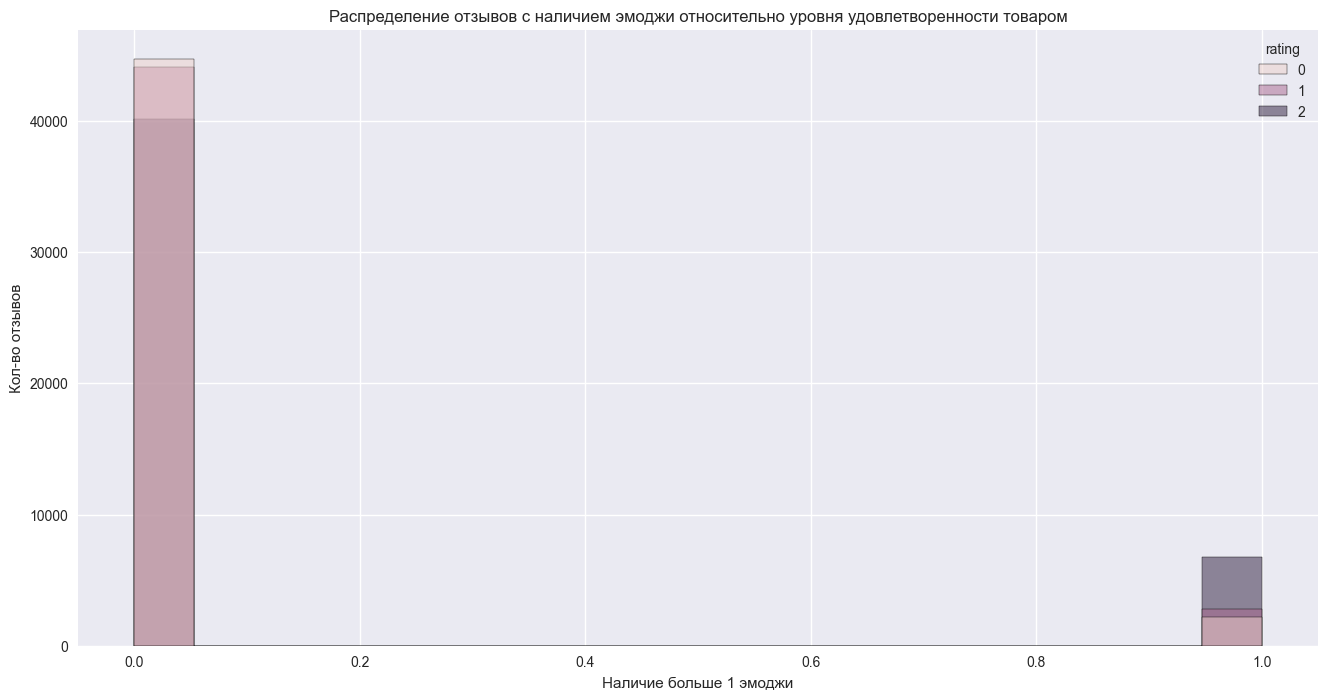

In [448]:
new_good_samp['extract_emojis'] = new_good_samp['extract_emojis'].apply(lambda x: 1 if x > 0 else 0)
sns.histplot(data=new_good_samp, hue='rating', x='extract_emojis')
plt.xlabel('Наличие больше 1 эмоджи')
plt.ylabel('Кол-во отзывов')
plt.title('Распределение отзывов с наличием эмоджи относительно уровня удовлетворенности товаром')

In [3]:
from functools import reduce

In [11]:
text_neg = list(filter(lambda z: len(z) > 0, reduce(lambda x,y: x+ ' ' + y, new_good_samp[new_good_samp.rating == 0].message.str.lower().tolist()).split()))

In [ ]:
text_neg

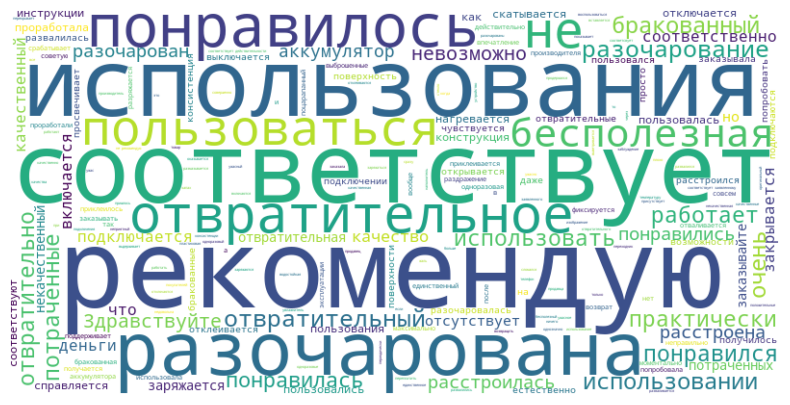

In [464]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Пример текста
text = reduce(lambda x,y: x+' '+y, text_neg)

# Создание облака слов
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white',  # Цвет фона
    colormap='viridis'        # Цветовая схема
).generate(text)

# Отображение
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Убираем оси
plt.show()

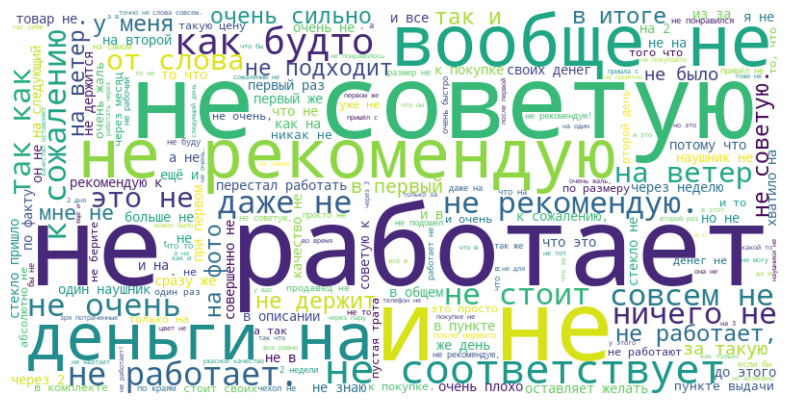

In [12]:
import nltk
from nltk import bigrams
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Генерация биграм
bigram_list = list(bigrams(text_neg))

# Преобразуем биграмы в строки (например, "natural language" вместо ('natural', 'language'))
bigram_strings = [' '.join(bigram) for bigram in bigram_list]

# Считаем частотность биграм
bigram_counts = Counter(bigram_strings)

# Фильтруем биграмы (например, оставляем только те, что встречаются минимум 2 раза)
filtered_bigrams = {k: v for k, v in bigram_counts.items() if v >= 1}

# Создаём облако слов
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis'
).generate_from_frequencies(filtered_bigrams)

# Отображаем облако
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [14]:
text_neutral = list(filter(lambda z: len(z) > 0, reduce(lambda x,y: x+ ' ' + y, new_good_samp[new_good_samp.rating == 1].message.str.lower().tolist()).split()))

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Пример текста
text = reduce(lambda x,y: x+' '+y, text_neutral)

# Создание облака слов
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white',  # Цвет фона
    colormap='viridis'        # Цветовая схема
).generate(text)

# Отображение
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Убираем оси
plt.show()

KeyboardInterrupt: 

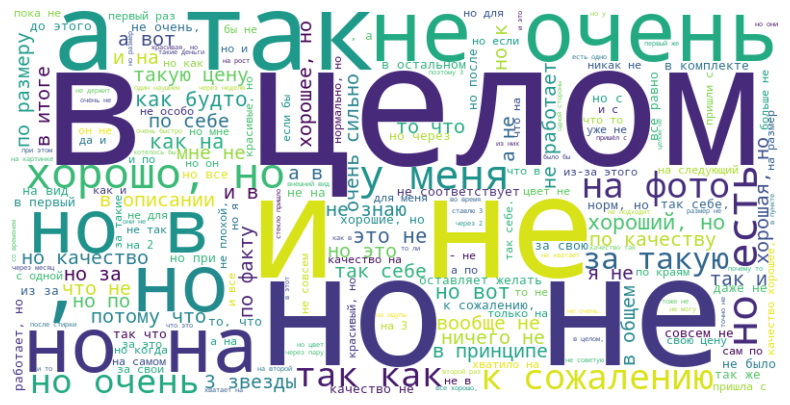

In [16]:
import nltk
from nltk import bigrams
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Генерация биграм
bigram_list = list(bigrams(text_neutral))

# Преобразуем биграмы в строки (например, "natural language" вместо ('natural', 'language'))
bigram_strings = [' '.join(bigram) for bigram in bigram_list]

# Считаем частотность биграм
bigram_counts = Counter(bigram_strings)

# Фильтруем биграмы (например, оставляем только те, что встречаются минимум 2 раза)
filtered_bigrams = {k: v for k, v in bigram_counts.items() if v >= 1}

# Создаём облако слов
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis'
).generate_from_frequencies(filtered_bigrams)

# Отображаем облако
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [21]:
text_positive = list(filter(lambda z: len(z) > 0, reduce(lambda x,y: str(x) + ' ' + str(y), new_good_samp[new_good_samp.rating == 2].message.tolist()).split()))

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Пример текста
text = reduce(lambda x,y: x+' '+y, text_positive)

# Создание облака слов
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white',  # Цвет фона
    colormap='viridis'        # Цветовая схема
).generate(text)

# Отображение
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Убираем оси
plt.show()

KeyboardInterrupt: 

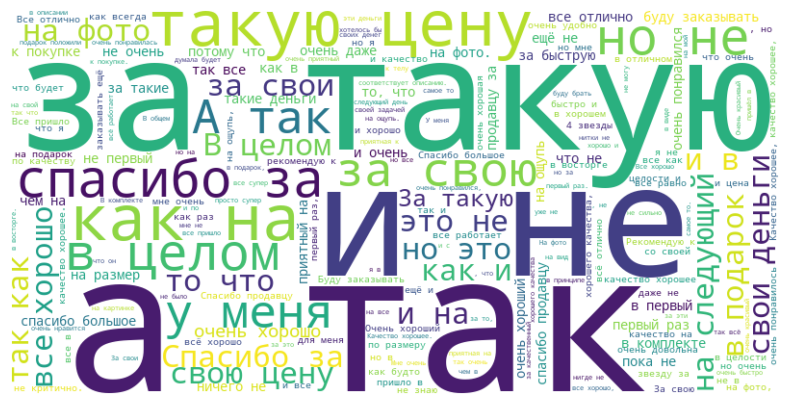

In [23]:
import nltk
from nltk import bigrams
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Генерация биграм
bigram_list = list(bigrams(text_positive))

# Преобразуем биграмы в строки (например, "natural language" вместо ('natural', 'language'))
bigram_strings = [' '.join(bigram) for bigram in bigram_list]

# Считаем частотность биграм
bigram_counts = Counter(bigram_strings)

# Фильтруем биграмы (например, оставляем только те, что встречаются минимум 2 раза)
filtered_bigrams = {k: v for k, v in bigram_counts.items() if v >= 1}

# Создаём облако слов
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis'
).generate_from_frequencies(filtered_bigrams)

# Отображаем облако
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Text(0.5, 1.0, 'Распределение длины отзыва относительно уровня удовлетворенности товаром')

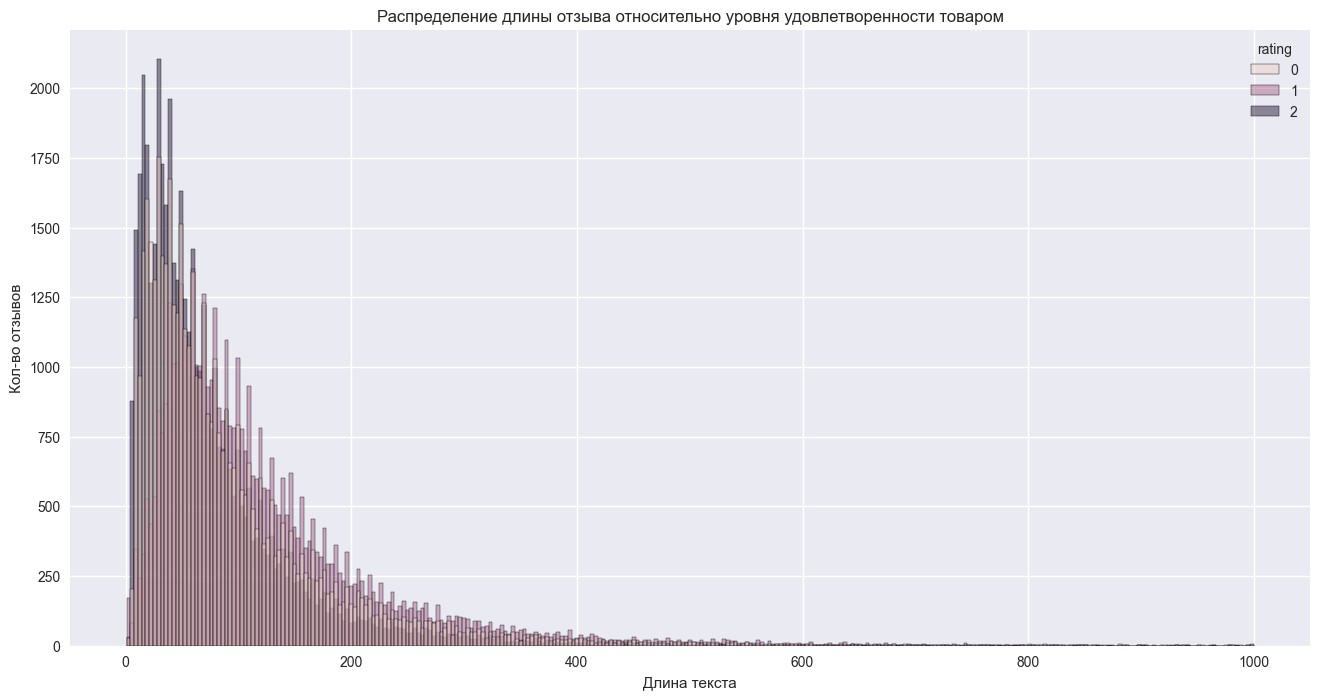

In [404]:
new_good_samp['text_length'] = new_good_samp['message'].apply(len)
tmp_reviews = new_good_samp[new_good_samp.text_length <= 1000]
sns.histplot(data=tmp_reviews, hue='rating', x='text_length')
plt.xlabel('Длина текста')
plt.ylabel('Кол-во отзывов')
plt.title('Распределение длины отзыва относительно уровня удовлетворенности товаром')

In [416]:
new_good_samp['cnt_words'] = new_good_samp['message'].apply(lambda x: len(x.split()))

Text(0.5, 1.0, 'Распределение кол-во слов в отзыве относительно уровня удовлетворенности товаром')

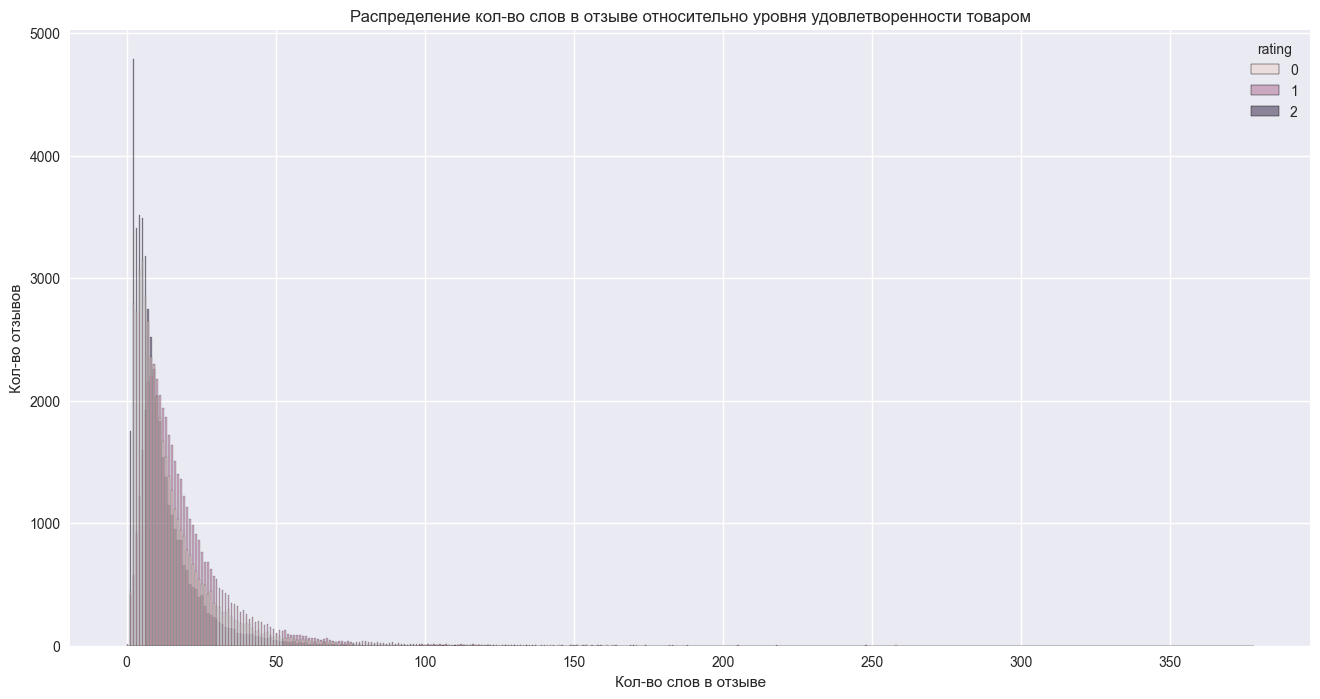

In [419]:
sns.histplot(data=new_good_samp, hue='rating', x='cnt_words')
plt.xlabel('Кол-во слов в отзыве')
plt.ylabel('Кол-во отзывов')
plt.title('Распределение кол-во слов в отзыве относительно уровня удовлетворенности товаром')

In [420]:
new_good_samp['has_quest'] = new_good_samp['message'].apply(lambda x: '?' in x or '!' in x)

Text(0.5, 1.0, 'Распределение отзывов по наличию ? или ! относительно уровня удовлетворенности товаром')

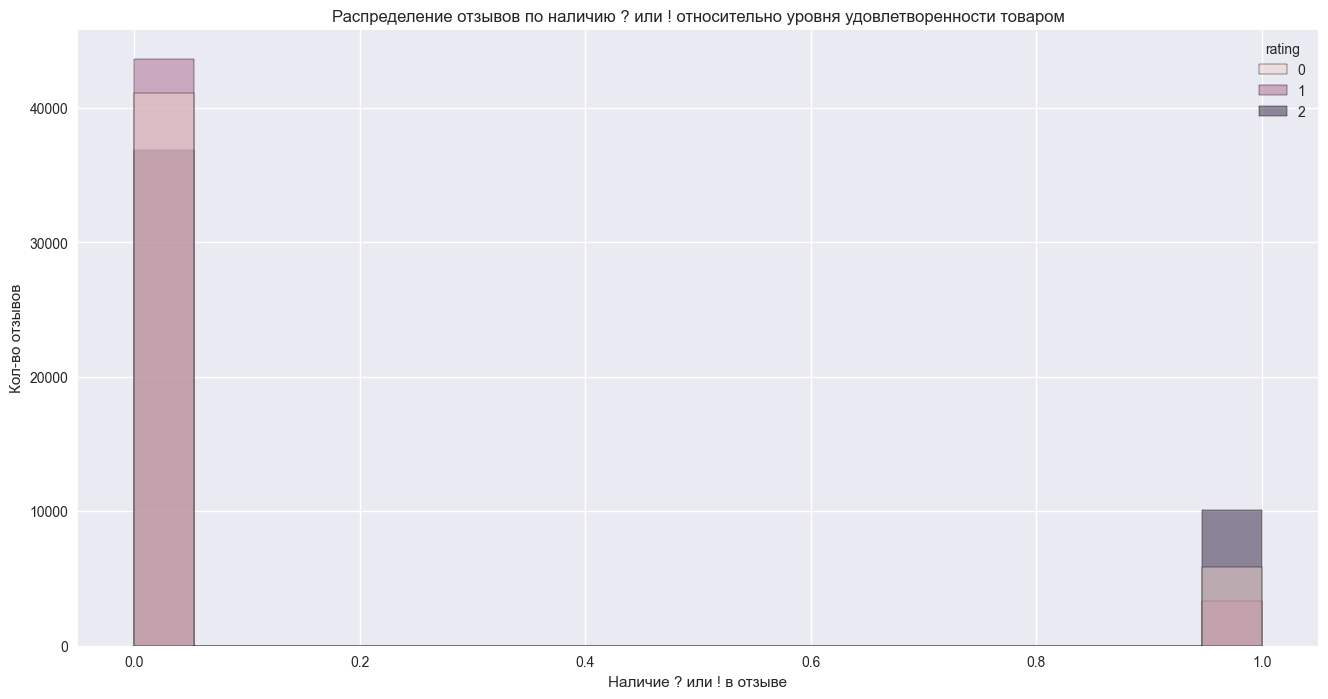

In [422]:
sns.histplot(data=new_good_samp, hue='rating', x='has_quest')
plt.xlabel('Наличие ? или ! в отзыве')
plt.ylabel('Кол-во отзывов')
plt.title('Распределение отзывов по наличию ? или ! относительно уровня удовлетворенности товаром')

In [423]:
new_good_samp['has_caps_lock'] = new_good_samp['message'].apply(has_any_caps_word).astype(int)
new_good_samp['has_numeric'] = new_good_samp['message'].apply(count_digits)

In [433]:
br = new_good_samp.groupby(by='rating')['has_caps_lock'].sum().reset_index()

Text(0.5, 1.0, 'Распределение кол-во отзывов с наличием CAPS LOCK относительно уровня удовлетворенности товаром')

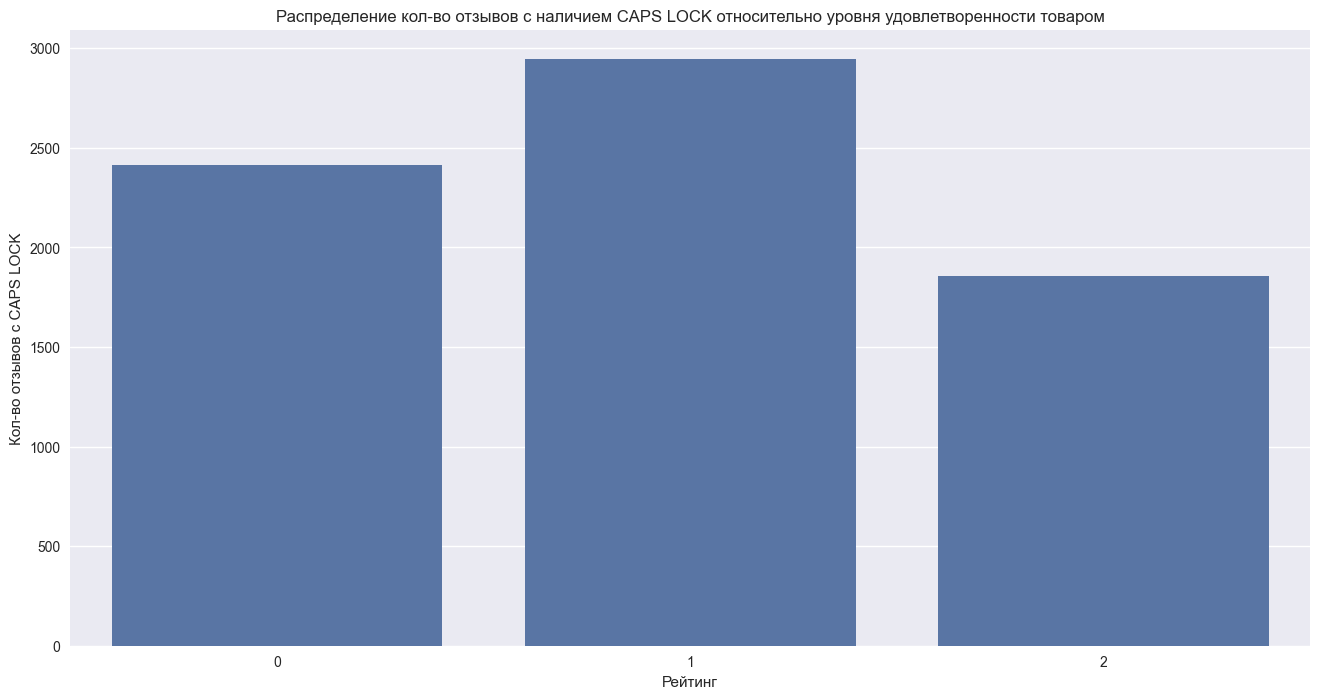

In [437]:
sns.barplot(data=br, x='rating', y='has_caps_lock')
plt.xlabel('Рейтинг')
plt.ylabel('Кол-во отзывов с CAPS LOCK')
plt.title('Распределение кол-во отзывов с наличием CAPS LOCK относительно уровня удовлетворенности товаром')

In [439]:
br = new_good_samp.groupby(by='rating')['has_numeric'].sum().reset_index()

Text(0.5, 1.0, 'Распределение отзывов по кол-ву чисел относительно уровня удовлетворенности товаром')

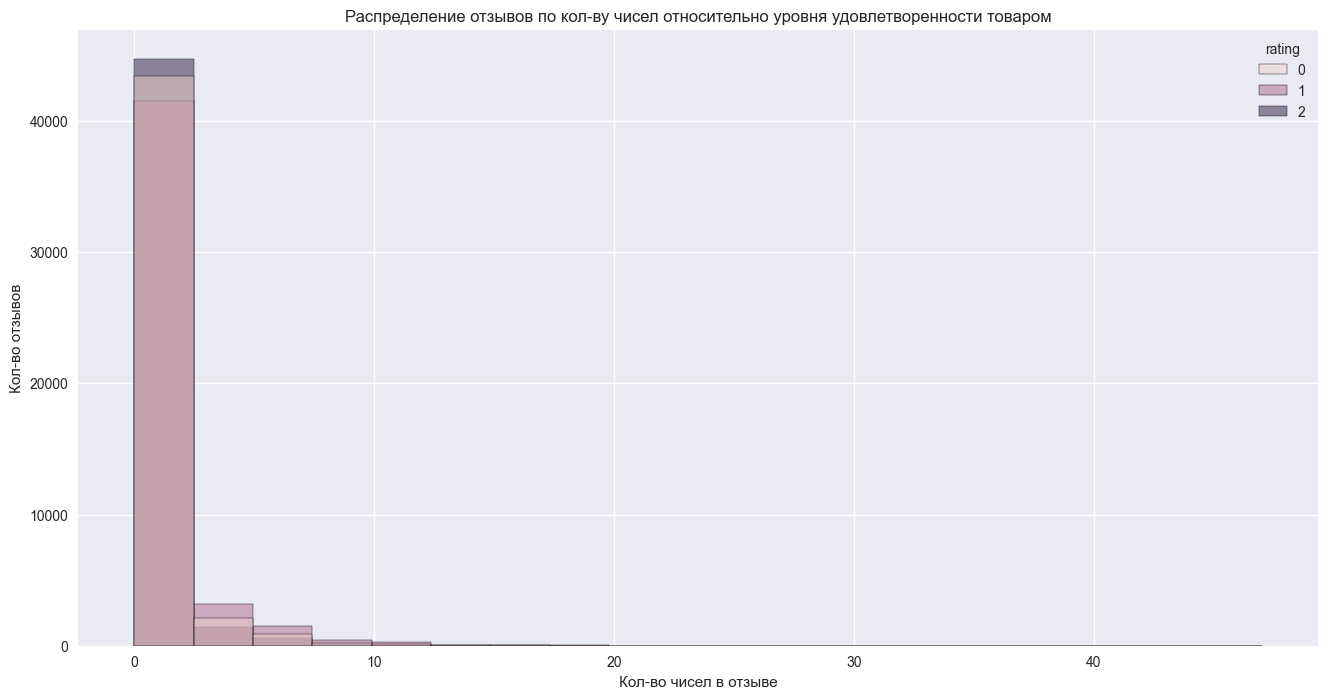

In [445]:
sns.histplot(data=new_good_samp, x='has_numeric', hue='rating')
plt.xlabel('Кол-во чисел в отзыве')
plt.ylabel('Кол-во отзывов')
plt.title('Распределение отзывов по кол-ву чисел относительно уровня удовлетворенности товаром')

In [183]:
bad_samp = new_reviews.merge(new_good_samp[['message', 'rating_check']], how='left', on='message')
bad_samp = bad_samp[bad_samp.rating_check.isna()]

bad_samp['rating'] = bad_samp['rating'].apply(lambda x: 2 if x >= 4 else 1 if x == 3 else 0)

In [269]:
tf_idf

TfidfVectorizer()

для катбуста

In [310]:
# Функция вытаскивания эмоджи из отзывов
def extract_emojis(text):
    return list(emoji.analyze(text))

# Функция удаления эмоджи из отзывов
def remove_emojis(text):
    return emoji.replace_emoji(text, replace="")

# Функция средней длины слова в отзыве
def avg(x):
    try:
        return sum(list(map(len, x.split()))) / len(list(map(len, x.split())))
    except:
        return 0
    
# Функция наличия слов с БОЛЬШИМИ БУКВАМИ(CAPS LOCK)
def has_any_caps_word(text):
    return sum(word.isupper() and len(word) > 1 for word in text.split())

# Функция вовзрата кол-во цифр в отзыве
def count_digits(text):
    return sum(char.isdigit() for char in text)



X = big_reviews
y = X['rating']

X = pd.DataFrame(X.drop(columns=['rating']))
X['emogi'] = X['message'].apply(extract_emojis)
X['message'] = X['message'].apply(remove_emojis)
X['len_message'] = X['message'].apply(len)
X['count_words'] = X['message'].apply(lambda x: len(x.split()))
X['avg_len_word'] = X['message'].apply(avg)
X['emogi'] = X['emogi'].apply(lambda x: x[0] if len(x) > 0 else '').astype(str)
X['emogi'] = encoder.fit_transform(X['emogi'])
X['has_sign'] = X['message'].apply(lambda x: '!' in x or '?' in x).astype(int)
X['has_caps_lock'] = X['message'].apply(has_any_caps_word).astype(int)
X['has_numeric'] = X['message'].apply(count_digits)

In [222]:
X

sku_id                                            message  emogi  \
0       1865659      Хороший наполнитель,беру постоянно только его      0   
1       5504545  Держатель пришёл неисправный. Кнопка вк/выкл о...      0   
2       5447032  Обычная скатка, не лучше обычного Пропеллера. ...      0   
3       3711850                     густая, выравнивает на отлично      0   
4       1025438  Отличная овощерезка! Незаменимая вещь на кухне...      0   
...         ...                                                ...    ...   
380881  1536779  запах нравится, не резкий, пришло всё аккуратн...      0   
380882  2529674                         удобный, небольшой фонарик      0   
380883  3642778      очень много блесток. на фото они плохо видны.      0   
380884  5261439                   Очень высокого качества. Спасибо      0   
380885  4740725      Очень яркие цвета. Отлично рисуют на асфальте      0   

        len_message  count_words  avg_len_word  has_sign  has_caps_lock  \
0                45            5      8.200000         0              0   
1               251           35      6.142857         0              0   
2                79           11      6.272727         0              0   
3                30            4      6.750000         0              0   
4               306           35      7.685714         1              0   
...             ...          ...           ...       ...            ...   
380881          163           27      5.074074         0              0   
380882           26            3      8.000000         0              0   
380883           45            8      4.750000         0              0   
380884           32            4      7.250000         0              0   
380885           45            7      5.571429         0              0   

        has_numeric  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
...             ...  
380881            0  
380882            0  
380883            0  
380884            0  
380885            0  

[5705235 rows x 9 columns]

In [223]:
X['label'] = cb.predict(X.drop(columns=['sku_id']))

In [226]:
X['real_label'] = y
X['real_label'] = X['real_label'].apply(lambda x: 2 if x>=4 else 1 if x==3 else 0)

In [231]:
new_frame = X.groupby(by='sku_id').agg({'label': ['mean'], 'real_label':['mean']})

In [240]:
f_df = new_frame['label'].reset_index()
f_df.columns = ['sku_id', 'mean_rating']

s_df = new_frame['real_label'].reset_index()
s_df.columns = ['sku_id', 'mean_real_label']

In [242]:
new_frame = f_df.merge(s_df, how='inner', on='sku_id')

In [258]:
new_frame['diff'] = new_frame['mean_real_label'] - new_frame['mean_rating']
new_frame['diff_percentage'] = abs(new_frame['mean_real_label'] - new_frame['mean_rating']) / new_frame['mean_real_label']

In [320]:
new_frame['mean_rating'].mean(), new_frame['mean_real_label'].mean()

(1.5731616461109552, 1.7615464737435789)

<Axes: >

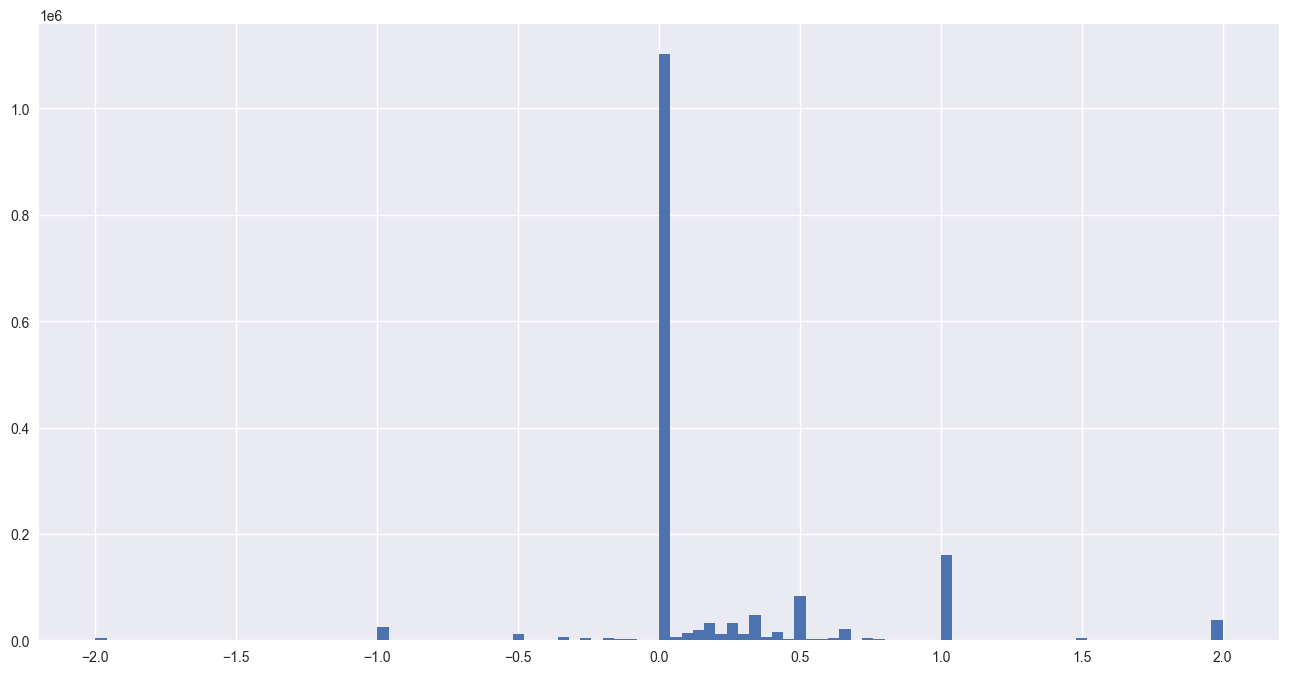

In [267]:
new_frame['diff'].hist(bins=100)

для лайт gbm

In [312]:
X_message = tf_idf.fit_transform(X['message'])

In [314]:
X_num = X.drop(columns=['message', 'sku_id']).values

In [315]:
X_new = sparse.hstack([X_message, sparse.csr_matrix(X_num)])

In [316]:
X_new

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 78375843 stored elements and shape (5705235, 502436)>

In [319]:
ans = model.predict(X_new, predict_disable_shape_check=True)

KeyboardInterrupt: 

In [299]:
ans = np.argmax(ans, axis=1)

In [300]:
ans

array([0, 0, 0, ..., 0, 2, 2])

In [306]:
list(ans)

[0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,


In [308]:
X.shape

(140835, 86924)

In [309]:
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2354332 stored elements and shape (140835, 86924)>

In [311]:
X['label_lgb'] = list(ans)

ValueError: Length of values (140835) does not match length of index (5705235)

In [250]:
cb.get_params()

{'iterations': 150,
 'learning_rate': 0.2981349614396957,
 'depth': 8,
 'l2_leaf_reg': 6.6184585077330045,
 'verbose': True,
 'random_strength': 0.9787981137142624,
 'bagging_temperature': 0.18671254094583584,
 'min_data_in_leaf': 12,
 'text_features': ['message']}

Берем датасет, где наша разметка не была уверена в исходном рейтинге

In [169]:
new_good_samp

Unnamed: 0.1  Unnamed: 0  \
0            5495728      207044   
1            1130174      375289   
2            2127279      239212   
3            5041045      130084   
4              38016       38016   
...              ...         ...   
140830       2917120      273855   
140831       4296077      140907   
140832        673919      296628   
140833       3701438      302022   
140834       1668438      158375   

                                                  message  rating  \
0       Прислали хлам, еще и не хватает, не советую к ...       0   
1         Не работает. не реагирует ни флешку ни на мышку       0   
2       написано размер 5-6 лет.на самом деле очень ма...       0   
3       Не поняла прикола. Ночью все отвалились,хотя к...       0   
4       Не понравилось качество …. Больше брать не буд...       0   
...                                                   ...     ...   
140830        Идеально подошел. Очень понравилась обложка       2   
140831  Спасибо продавцу-хорошие крючки и плюс бонус п...       2   
140832  Все работает. Не понятно только как её включат...       2   
140833       Очень понравилось , дети в восторге .Спасибо       2   
140834  беру не в первый раз, вкус нравится, выгодное ...       2   

        rating_check word_rat word_rat_negative  
0                  0      Bad              Good  
1                  0      Bad              Good  
2                  0      Bad              Good  
3                  0      Bad              Good  
4                  0      Bad              Good  
...              ...      ...               ...  
140830             2     Good               Bad  
140831             2     Good               Bad  
140832             2     Good               Bad  
140833             2     Good               Bad  
140834             2     Good               Bad  

[140835 rows x 7 columns]

# Предобрабатываем отзывы с помощью TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sentence_transformers import SentenceTransformer
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
import lightgbm as lgb
from scipy import sparse
import emoji

In [18]:
model = TfidfVectorizer()

In [19]:
new_messages = model.fit_transform(new_reviews_1.message.tolist())

In [ ]:
# Функция вытаскивания эмоджи из отзывов
def extract_emojis(text):
    return list(emoji.analyze(text))

# Функция удаления эмоджи из отзывов
def remove_emojis(text):
    return emoji.replace_emoji(text, replace="")

# Функция средней длины слова в отзыве
def avg(x):
    try:
        return sum(list(map(len, x.split()))) / len(list(map(len, x.split())))
    except:
        return 0
    
# Функция наличия слов с БОЛЬШИМИ БУКВАМИ(CAPS LOCK)
def has_any_caps_word(text):
    return sum(word.isupper() and len(word) > 1 for word in text.split())

# Функция вовзрата кол-во цифр в отзыве
def count_digits(text):
    return sum(char.isdigit() for char in text)


X = pd.DataFrame(new_good_samp['message'])
X['emogi'] = X['message'].apply(extract_emojis)
X['message'] = X['message'].apply(remove_emojis)
X['len_message'] = X['message'].apply(len)
X['count_words'] = X['message'].apply(lambda x: len(x.split()))
X['avg_len_word'] = X['message'].apply(avg)
X['emogi'] = X['emogi'].apply(lambda x: x[0] if len(x) > 0 else '').astype(str)
X['emogi'] = encoder.fit_transform(X['emogi'])
X['has_sign'] = X['message'].apply(lambda x: '!' in x or '?' in x).astype(int)
X['has_caps_lock'] = X['message'].apply(has_any_caps_word).astype(int)
X['has_numeric'] = X['message'].apply(count_digits)

In [ ]:
# Функция удаления эмоджи из отзывов
def remove_emojis(text):
    return emoji.replace_emoji(text, replace="")

In [149]:
# Функция средней длины слова в отзыве
def avg(x):
    try:
        return sum(list(map(len, x.split()))) / len(list(map(len, x.split())))
    except:
        return 0

In [ ]:
# Функция наличия слов с БОЛЬШИМИ БУКВАМИ(CAPS LOCK)
def has_any_caps_word(text):
    return sum(word.isupper() and len(word) > 1 for word in text.split())

In [151]:
# Функция вовзрата кол-во цифр в отзыве
def count_digits(text):
    return sum(char.isdigit() for char in text)

In [152]:
encoder = LabelEncoder()

In [326]:
X = pd.DataFrame(new_good_samp['message'])
X['emogi'] = X['message'].apply(extract_emojis)
X['message'] = X['message'].apply(remove_emojis)
X['len_message'] = X['message'].apply(len)
X['count_words'] = X['message'].apply(lambda x: len(x.split()))
X['avg_len_word'] = X['message'].apply(avg)
X['emogi'] = X['emogi'].apply(lambda x: x[0] if len(x) > 0 else '').astype(str)
X['emogi'] = encoder.fit_transform(X['emogi'])
X['has_sign'] = X['message'].apply(lambda x: '!' in x or '?' in x).astype(int)
X['has_caps_lock'] = X['message'].apply(has_any_caps_word).astype(int)
X['has_numeric'] = X['message'].apply(count_digits)

In [327]:
y = new_good_samp['rating']

In [328]:
X_num = X[['emogi', 'len_message',	'count_words',	'avg_len_word','has_sign',	'has_caps_lock',	'has_numeric']]

In [329]:
from scipy import sparse

In [330]:
X_num = sparse.csr_matrix(X_num)

In [331]:
X_message = tf_idf.fit_transform(X['message'].tolist())

In [332]:
X_num = sparse.csr_matrix(X_num)
X = sparse.hstack([X_message,X_num])

In [333]:
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2354332 stored elements and shape (140835, 86924)>

In [334]:
y = new_good_samp['rating']

# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.9, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.8, random_state=42)

In [272]:
xgb = XGBClassifier()

In [274]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred = xgb.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)

round(accuracy, 3) * 100

81.39999999999999

In [ ]:
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_valid, label=y_valid, reference=train_data)

# Параметры модели
params = {
    'objective': 'multiclass', 
    'num_class': 3,                  # Количество классов
    'metric': 'multi_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'verbose': -1
}

# Обучение
model = lgb.train(
    params,
    train_data,
    valid_sets=[test_data],
    num_boost_round=250
)

In [ ]:
y_preds = np.argmax(model.predict(X_valid), axis=1)
accuracy_score(y_valid, y_preds)

0.8315253836140586

In [ ]:
round(accuracy_score(y_valid, y_preds), 3) * 100

83.1

Проверяем LightGBM на данных с несовпадающией разметкой(исходной и новой)

In [92]:
X = pd.DataFrame(bad_samp['message'].astype(str))
X['emogi'] = X['message'].apply(extract_emojis)
X['message'] = X['message'].apply(remove_emojis)
X['len_message'] = X['message'].apply(len)
X['count_words'] = X['message'].apply(lambda x: len(x.split()))
X['avg_len_word'] = X['message'].apply(avg)
X['emogi'] = X['emogi'].apply(lambda x: x[0] if len(x) > 0 else '').astype(str)
X['emogi'] = encoder.fit_transform(X['emogi'])
X['has_sign'] = X['message'].apply(lambda x: '!' in x or '?' in x).astype(int)
X['has_caps_lock'] = X['message'].apply(has_any_caps_word).astype(int)
X['has_numeric'] = X['message'].apply(count_digits)

In [96]:
test_message = tf_idf.transform(X.message.tolist())

In [ ]:
X_num = X[['emogi', 'len_message',	'count_words',	'avg_len_word','has_sign',	'has_caps_lock', 'has_numeric']]

In [98]:
X_num = sparse.csr_matrix(X_num)
new_X = sparse.hstack([test_message,X_num])

In [102]:
preds = np.argmax(model.predict(new_X), axis=1)

In [133]:
X['pred_cb'] = cb.predict(X.drop(columns=['pred', 'pred_lgb', 'real_rating', 'abs_diff']))

In [140]:
(X['pred_cb'] == X['pred_lgb']).value_counts()

True     201721
False     63881
Name: count, dtype: int64

In [109]:
X['pred_lgb'] = preds

In [125]:
X['real_rating'] = y

In [135]:
X['abs_diff_catboost'] = np.abs(X['real_rating'] - X['pred_cb'])

In [137]:
X['abs_diff_lightgbm'] = np.abs(X['real_rating'] - X['pred_lgb'])

Смотрим распределение предсказанных меток у CatBoost и LightGBM

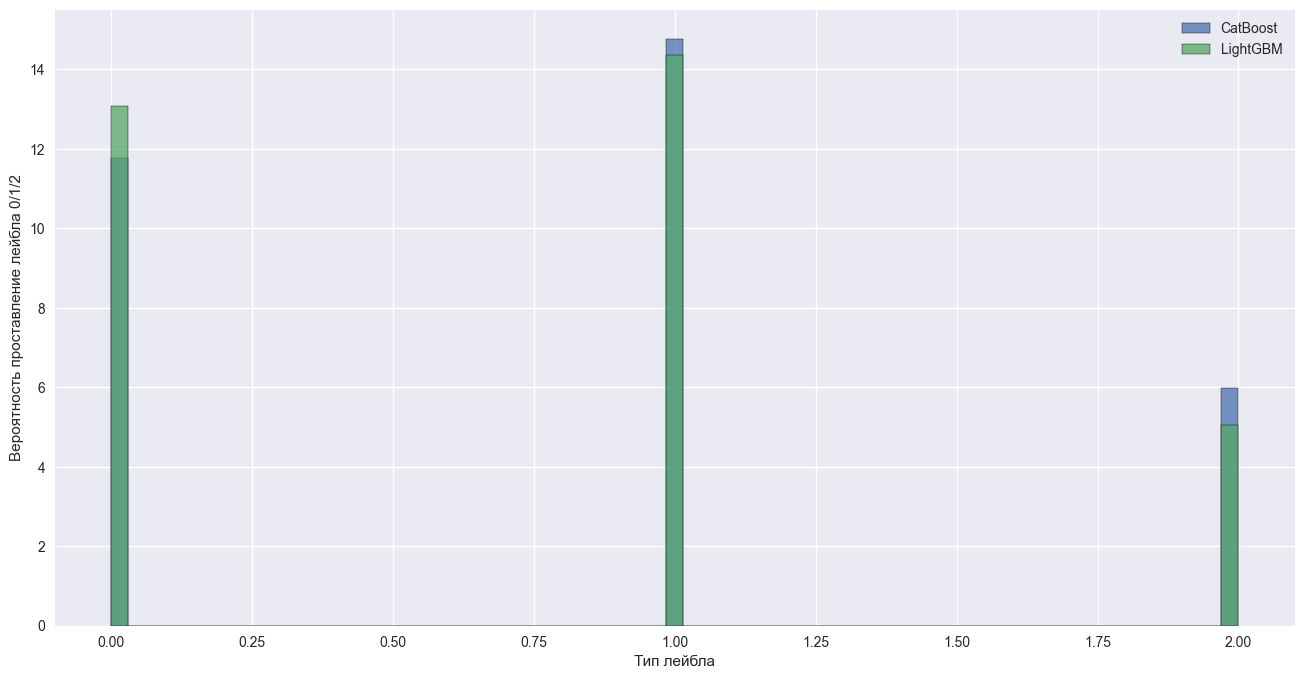

In [147]:
a = sns.histplot(data=X, x='pred_cb', label='CatBoost', stat="density") 
b = sns.histplot(data=X, x='pred_lgb', label='LightGBM', stat="density") 
plt.ylabel('Вероятность проставление лейбла 0/1/2')
plt.xlabel('Тип лейбла')

plt.legend()


plt.show()

In [119]:
t = pd.DataFrame(instance.merge(X, how='inner', on='message')[['message', 'pred_lgb', 'real_rating']])

In [123]:
t.drop_duplicates().to_excel('instance.xlsx')

In [295]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
lgb.fit(X_train, y_train)

In [275]:
y_pred = xgb.predict(X_valid)

In [277]:
accuracy_score(y_valid, y_pred)

0.8145240818902607

# Обучение Random Forest Classifier, SVM, Logistic Regression с предобработкой TF-IDF

In [324]:
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [365]:
lr = LogisticRegression(max_iter=1000)

In [366]:
lr.fit(X_train, y_train)

/Users/adov_ad/research_features/.conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(max_iter=1000)

In [370]:
y_train.value_counts()

rating
0    33873
1    33801
2    33726
Name: count, dtype: int64

In [368]:
y_pred = lr.predict(X_valid)

accuracy_score(y_valid, y_pred)

0.6484951283973018

In [391]:
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

RandomForestClassifier()

In [384]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
y_pred = rf.predict(X_valid)

accuracy_score(y_valid, y_pred)

0.812624254473161

In [350]:
rf.feature_importances_.shape

(86924,)

In [344]:
svm = SVC()

svm.fit(X_train, y_train)

SVC()

In [345]:
y_pred = svm.predict(X_valid)

accuracy_score(y_valid, y_pred)

0.4440850459547947

In [375]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.datasets import load_iris  # Пример данных (можно заменить на свои)

In [376]:
param_grid = {
    'n_estimators': [50, 100, 200],  # Количество деревьев
    'max_depth': [10, 20, 30],  # Максимальная глубина дерева
    'min_samples_split': [2, 5, 10],  # Минимальное число samples для разделения узла
    'min_samples_leaf': [1, 2, 4],    # Минимальное число samples в листе
    'bootstrap': [True, False],       # Использовать ли bootstrap для выборки
    'criterion': ['gini', 'entropy']  # Критерий разделения
}

In [387]:
rf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=20,          # Количество случайных комбинаций
    cv=5,               # 5-fold кросс-валидация
    scoring='accuracy',  # Метрика (можно 'f1', 'roc_auc' и др.)
    n_jobs=-1,          # Использовать все ядра CPU
    verbose=2,          # Подробный вывод
    random_state=42     # Для воспроизводимости
)

In [388]:
random_search.fit(X, y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END bootstrap=True, criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=  18.8s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=  19.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=  19.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=  19.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=  19.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  20.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total t

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, scoring='accuracy', verbose=2)

In [389]:
# Вывод результатов
print("Лучшие параметры:", random_search.best_params_)
print("Лучшая accuracy:", random_search.best_score_)

# Сохранение лучшей модели
best_rf = random_search.best_estimator_

Лучшие параметры: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30, 'criterion': 'entropy', 'bootstrap': True}
Лучшая accuracy: 0.7638797173997941


In [390]:
y_pred = best_rf.predict(X_valid)

accuracy_score(y_valid, y_pred)

0.8019013056684154

# Косинусное расстояние + Metric Learning (Contrastive Loss)

In [311]:
new_good_samp['word_rat_negative'] = new_good_samp['rating'].apply(lambda x: 'Bad' if x == 2 else 'Neutral' if x == 1 else 'Good')

In [ ]:
train = new_good_samp.sample(125000, replace=False)
eval = new_good_samp[~new_good_samp.message.isin(train.message.tolist())]

In [ ]:
subsamp = train[train.rating == 1]
subsamp['word_rat'] = 'Good'
subsamp['word_rat_negative'] = 'Bad'

In [316]:
subsamp['word_rat'] = 'Good'
subsamp['word_rat_negative'] = 'Bad'

In [ ]:
d = dict()

In [317]:
d['sentance1'] = train.message.tolist() + train.message.tolist() + subsamp.message.tolist() + subsamp.message.tolist()
d['sentance2'] = train.word_rat.tolist() + train.word_rat_negative.tolist() + subsamp.word_rat.tolist() + subsamp.word_rat.tolist()
d['label'] = [1] * train.shape[0] + [0] * train.shape[0] + [0] * subsamp.shape[0] + [0] * subsamp.shape[0]

In [318]:
d

{'sentance1': ['Чехол по размеру подошёл на 8+.Но по краю рисунок отпадает.',
  'Шарики не качественные, из 10 порвалось при надувании 3 штуки, два было порвано изначально.',
  'яркая, красивая.. но облазиет ужасно, краска прям сыпится((( обидно..',
  'Милый футляр, пришло все быстро 👍🏼',
  'не держится',
  'Потресканные, а так на вид и цвет картинке соответствуют',
  'хорошее качество!!! смотрится супер',
  'Сушили отлично ) три раза воспользовались и перегорел шнур. Заказывала за 500 р',
  'неплохой крем, увлажняет)',
  'сумка хорошая мне понравилась!!!!!',
  'не работает с насадкой для стрижки бороды, а с другой насадкой работает.',
  'отлично',
  'Тапочки тонкие и легкие, такие же как на картинке',
  'Заказала цвет Коралловый, думала как на фото, оказалось совсем не то.....\r\nЗаказом недовольна \r\n\r\n',
  'Цвет красивый,но консистенция слишком густая,неудобно  наносится и цвет из-за этого словно пятнами.',
  'Лосины пришли отлично упакованы, плотны, не просвечивают, не короткие,

In [164]:
from peft import LoraConfig, get_peft_model, TaskType
from sentence_transformers import SentenceTransformer, SentenceTransformerTrainer, losses, evaluation
from datasets import Dataset
import logging

In [ ]:
train_data['sentance1'] = train.message.tolist() + train.message.tolist() + subsamp.message.tolist() + subsamp.message.tolist()
train_data['sentance2'] = train.word_rat.tolist() + train.word_rat_negative.tolist() + subsamp.word_rat.tolist() + subsamp.word_rat.tolist()
train_data['label'] = [1] * train.shape[0] + [0] * train.shape[0] + [0] * subsamp.shape[0] + [0] * subsamp.shape[0]

subsamp = eval[eval.rating == 1]
subsamp['word_rat'] = 'Good'
subsamp['word_rat_negative'] = 'Bad'

eval_data['sentance1'] = eval.message.tolist() + eval.message.tolist() + subsamp.message.tolist() + subsamp.message.tolist()
eval_data['sentance2'] = eval.word_rat.tolist() + eval.word_rat_negative.tolist() + subsamp.word_rat.tolist() + subsamp.word_rat.tolist()
eval_data['label'] = [1] * eval.shape[0] + [0] * eval.shape[0] + [0] * subsamp.shape[0] + [0] * subsamp.shape[0]
# Подготовка данных
train_dataset = Dataset.from_dict(train_data)
eval_dataset = Dataset.from_dict(eval_data)  # Ваша валидационная выборка

train_dataset = train_dataset.shuffle(seed=42)  # seed для воспроизводимости
train_dataset = train_dataset.select(range(5000))

In [339]:
train_dataset

Dataset({
    features: ['sentance1', 'sentance2', 'label'],
    num_rows: 5000
})

In [ ]:
from peft import LoraConfig, get_peft_model, TaskType
from sentence_transformers import SentenceTransformer, SentenceTransformerTrainer, losses
from datasets import Dataset

train_data = dict()
eval_data = dict()
subsamp = train[train.rating == 1]
subsamp['word_rat'] = 'Good'
subsamp['word_rat_negative'] = 'Bad'
train_data['sentance1'] = train.message.tolist() + train.message.tolist() + subsamp.message.tolist() + subsamp.message.tolist()
train_data['sentance2'] = train.word_rat.tolist() + train.word_rat_negative.tolist() + subsamp.word_rat.tolist() + subsamp.word_rat.tolist()
train_data['label'] = [1] * train.shape[0] + [0] * train.shape[0] + [0] * subsamp.shape[0] + [0] * subsamp.shape[0]
subsamp = eval[eval.rating == 1]
subsamp['word_rat'] = 'Good'
subsamp['word_rat_negative'] = 'Bad'
eval_data['sentance1'] = eval.message.tolist() + eval.message.tolist() + subsamp.message.tolist() + subsamp.message.tolist()
eval_data['sentance2'] = eval.word_rat.tolist() + eval.word_rat_negative.tolist() + subsamp.word_rat.tolist() + subsamp.word_rat.tolist()
eval_data['label'] = [1] * eval.shape[0] + [0] * eval.shape[0] + [0] * subsamp.shape[0] + [0] * subsamp.shape[0]
train_dataset = Dataset.from_dict(train_data)
eval_dataset = Dataset.from_dict(eval_data)

train_dataset = train_dataset.shuffle(seed=42)
#train_dataset = train_dataset.select(range(50000))

lora_config = LoraConfig(
    task_type=TaskType.FEATURE_EXTRACTION,
    target_modules=["key", "query", "value"],
    inference_mode=False, 
    r=8, 
    lora_alpha=32, 
    lora_dropout=0.1
)
model = SentenceTransformer("sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2")
loss = losses.ContrastiveLoss(model, margin=0.9)

model = get_peft_model(model, lora_config)

trainer = SentenceTransformerTrainer(
    model=model,
    train_dataset=train_dataset,
    loss=loss
)
trainer.train()

INFO:sentence_transformers.SentenceTransformer:Use pytorch device_name: mps
INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2
INFO:sentence_transformers.trainer:No `TrainingArguments` passed, using `output_dir=tmp_trainer`.
No label_names provided for model class `PeftModelForFeatureExtraction`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.


Computing widget examples:   0%|          | 0/1 [00:00<?, ?example/s]

INFO:sentence_transformers.trainer:Saving model checkpoint to tmp_trainer/checkpoint-500
INFO:sentence_transformers.trainer:Saving model checkpoint to tmp_trainer/checkpoint-1000
INFO:sentence_transformers.trainer:Saving model checkpoint to tmp_trainer/checkpoint-1500
INFO:sentence_transformers.trainer:Saving model checkpoint to tmp_trainer/checkpoint-2000
INFO:sentence_transformers.trainer:Saving model checkpoint to tmp_trainer/checkpoint-2500
INFO:sentence_transformers.trainer:Saving model checkpoint to tmp_trainer/checkpoint-3000
INFO:sentence_transformers.trainer:Saving model checkpoint to tmp_trainer/checkpoint-3500


KeyboardInterrupt: 

In [352]:
model.similarity(model.encode('Это хороший товар'), model.encode(['Bad', 'Neutral', 'Good']))

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.3389,  0.2942,  0.9513]])

In [367]:
answers = model.encode(['Bad', 'Neutral', 'Good'], show_progress_bar=False)

In [368]:
eval['pred'] = eval.apply(lambda x: np.argmax(model.similarity(model.encode(x['message'], show_progress_bar=False), answers)).item(), axis=1)

In [371]:
eval[eval.pred != eval.rating] 

Unnamed: 0                                            message  \
441772        64481  Вызвали аллергию, хотя носила и ношу самую раз...   
507981       130690                                       Жмёт в талии   
1582091       72028     качество сборки желает лучшего, магазины текут   
3677387      277971            Весь крошится, бледный, нам не зашло...   
4130326      353016                       Купили 400 гр. Очень тонкая.   
...             ...                                                ...   
4174854       19684  Не сразу понял что за треск. Оказалось это кра...   
1456805      324293                       Нереально красивые браслеты!   
2292565       27230            5 звёзд. Дата изготовления декабрь 2022   
5534420      245736                                             Мягкая   
4988518       77557  Качество трикотажа отличное. Не линяет, форму ...   

         rating  rating_check word_rat word_rat_negative  pred  
441772        0             0      Bad              Good     1  
507981        0             0      Bad              Good     1  
1582091       0             0      Bad              Good     1  
3677387       0             0      Bad              Good     2  
4130326       0             0      Bad              Good     1  
...         ...           ...      ...               ...   ...  
4174854       2             2     Good               Bad     0  
1456805       2             2     Good               Bad     0  
2292565       2             2     Good               Bad     1  
5534420       2             2     Good               Bad     1  
4988518       2             2     Good               Bad     1  

[5259 rows x 7 columns]

In [369]:
accuracy_score(eval.rating.values, eval.pred.values)

0.6543088148294222

In [157]:
X = pd.DataFrame(new_good_samp['message'])
X['emogi'] = X['message'].apply(extract_emojis)
X['message'] = X['message'].apply(remove_emojis)
X['len_message'] = X['message'].apply(len)
X['count_words'] = X['message'].apply(lambda x: len(x.split()))
X['avg_len_word'] = X['message'].apply(avg)
X['emogi'] = X['emogi'].apply(lambda x: x[0] if len(x) > 0 else '').astype(str)
X['emogi'] = encoder.fit_transform(X['emogi'])
X['has_sign'] = X['message'].apply(lambda x: '!' in x or '?' in x).astype(int)
X['has_caps_lock'] = X['message'].apply(has_any_caps_word).astype(int)
X['has_numeric'] = X['message'].apply(count_digits)

In [158]:
# Пример: предположим, что у нас есть текстовые фичи в колонке 'text_feature'
text_features = ['message']
y = new_good_samp['rating']

# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.9, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.8, random_state=42)

In [159]:
X_train

message  emogi  \
4950002  запах хороший, но само ощущение после крема не...      0   
4222347  нисколько не помогает. полная ерунда, трата де...      0   
3673411  Не очень, конфетти белые, вылетело штуки 3, ос...      0   
358043                           Чехол хороший. Рекомендую      0   
2912915  Очень классные фломастеры, купила ребёнку, он ...      0   
...                                                    ...    ...   
4535984  Мягкие осенние перчатки, матерчатые, цена и ка...      0   
2191309  Хорошие бусины. Алфавит не весь к сожалению, н...      0   
3655559        Пилка очень мягкая, пилит плохо, не советую      0   
3122520  Деньги на ветер за такую сумму вообще не стоит...      0   
1293209  все отлично и очень удобно,нигде не течет, про...      0   

         len_message  count_words  avg_len_word  has_sign  has_caps_lock  \
4950002           89           13      5.923077         0              0   
4222347          101           15      5.800000         1              0   
3673411           69           10      6.000000         0              0   
358043            25            3      7.666667         0              0   
2912915          136           17      7.058824         0              0   
...              ...          ...           ...       ...            ...   
4535984           66            8      7.375000         0              0   
2191309          100           18      4.611111         0              0   
3655559           43            7      5.285714         0              0   
3122520           72           12      5.083333         1              0   
1293209           73           10      6.400000         0              0   

         has_numeric  
4950002            0  
4222347            0  
3673411            1  
358043             0  
2912915            0  
...              ...  
4535984            0  
2191309            2  
3655559            0  
3122520            0  
1293209            0  

[101400 rows x 8 columns]

In [49]:
bad_samp = sample[sample.rating != sample.rating_check]

In [50]:
bad_samp

Unnamed: 0.1  Unnamed: 0  \
2             532933      155642   
3            1284786      152274   
12           1626166      116103   
16           4799751      266948   
19           2344418       79083   
...              ...         ...   
609903       1590992       80929   
609905       5244891      333930   
609910       4862181      329378   
609913       2730431       87166   
609914       5553745      265061   

                                                  message  rating  \
2       Работала лейка только три дня нормально, дальш...       0   
3       Размер М, соответствует размеру 134 т.е. на ре...       0   
12      Покупайте клей, сам по себе не сидит, хотя дел...       0   
16      На правой стороне замок не работает, не спуска...       0   
19      1 штука сгорела в проекте. 3 сгорели при дальн...       0   
...                                                   ...     ...   
609903                                  нормальное стекло       2   
609905                  3 месяца использования. Довольна.       2   
609910                      клевый чехол.подошел идеально       2   
609913  Взрослая и очень серьезная кошка на несколько ...       2   
609914                           Маленькие, милые, целые.       2   

        rating_check  
2                  2  
3                  1  
12                 1  
16                 1  
19                 1  
...              ...  
609903             1  
609905             1  
609910             0  
609913             0  
609914             1  

[265602 rows x 5 columns]

In [ ]:
from catboost import CatBoostClassifier, Pool
import optuna

# Grid Search CatBoostClassifier Parameters

In [24]:
classification_reports = []
def objective(trial):
    # Определение гиперпараметров для оптимизации
    params = {
        'iterations': trial.suggest_int('iterations', 100, 100),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'depth': trial.suggest_int('depth', 4, 10),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 50),
        'random_strength': trial.suggest_float('random_strength', 0.1, 1.0),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 1.0),
        'loss_function': 'MultiClass'  # или другая функция потерь
    }

    # Инициализация модели
    model = CatBoostClassifier(**params)

    model.fit(X_train, y_train,
             eval_set=(X_valid, y_valid),
             verbose=50,
             plot=True,
             text_features=['message']
    )
    # Предсказание на тестовой выборке
    y_pred = model.predict(X_test)

    # Оценка качества модели
    accuracy = accuracy_score(y_test, y_pred)

    classification_reports.append(classification_report(y_test, y_pred))
    
    return accuracy

In [30]:
from sklearn.metrics import classification_report

In [32]:
# Пример: предположим, что у нас есть текстовые фичи в колонке 'text_feature'
text_features = ['message']
y = new_good_samp['rating']

# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.9, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.8, random_state=42)

In [31]:
# Создание study и запуск оптимизации
study = optuna.create_study(direction='maximize')
study.optimize(objective,
               n_trials=20)

[I 2025-04-18 13:04:48,448] A new study created in memory with name: no-name-7f25ed96-a146-473c-a9c6-e5bb89733994


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.0856434	test: 1.0851295	best: 1.0851295 (0)	total: 238ms	remaining: 23.5s
50:	learn: 0.7370545	test: 0.7224941	best: 0.7224941 (50)	total: 11.1s	remaining: 10.6s


[I 2025-04-18 13:05:10,653] Trial 0 finished with value: 0.8028259017324624 and parameters: {'iterations': 100, 'learning_rate': 0.012728456982526691, 'depth': 6, 'l2_leaf_reg': 2.554861766760829, 'min_data_in_leaf': 41, 'random_strength': 0.888893924966859, 'bagging_temperature': 0.23375155997038644}. Best is trial 0 with value: 0.8028259017324624.


99:	learn: 0.6176933	test: 0.5966787	best: 0.5966787 (99)	total: 21.4s	remaining: 0us

bestTest = 0.5966786594
bestIteration = 99



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.8942244	test: 0.8854056	best: 0.8854056 (0)	total: 154ms	remaining: 15.2s
50:	learn: 0.4788167	test: 0.4556094	best: 0.4556094 (50)	total: 6.54s	remaining: 6.29s


[I 2025-04-18 13:05:23,737] Trial 1 finished with value: 0.8207185458676513 and parameters: {'iterations': 100, 'learning_rate': 0.22597131609675422, 'depth': 5, 'l2_leaf_reg': 2.8992327130719335, 'min_data_in_leaf': 24, 'random_strength': 0.6554402408542188, 'bagging_temperature': 0.8666445109944398}. Best is trial 1 with value: 0.8207185458676513.


99:	learn: 0.4583294	test: 0.4400930	best: 0.4400930 (99)	total: 12.3s	remaining: 0us

bestTest = 0.4400929685
bestIteration = 99



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.0398536	test: 1.0375565	best: 1.0375565 (0)	total: 114ms	remaining: 11.3s
50:	learn: 0.5336574	test: 0.5056232	best: 0.5056232 (50)	total: 6.32s	remaining: 6.07s


[I 2025-04-18 13:05:35,449] Trial 2 finished with value: 0.8097131496733883 and parameters: {'iterations': 100, 'learning_rate': 0.06092694627741445, 'depth': 4, 'l2_leaf_reg': 9.391203783287892, 'min_data_in_leaf': 41, 'random_strength': 0.46298809636169336, 'bagging_temperature': 0.9944632563009719}. Best is trial 1 with value: 0.8207185458676513.


99:	learn: 0.5073108	test: 0.4797183	best: 0.4797183 (99)	total: 11s	remaining: 0us

bestTest = 0.479718259
bestIteration = 99



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.0538422	test: 1.0523842	best: 1.0523842 (0)	total: 914ms	remaining: 1m 30s
50:	learn: 0.5318379	test: 0.5100344	best: 0.5100344 (50)	total: 43.7s	remaining: 42s


[I 2025-04-18 13:07:03,238] Trial 3 finished with value: 0.8127662595853451 and parameters: {'iterations': 100, 'learning_rate': 0.0426751207410684, 'depth': 9, 'l2_leaf_reg': 8.319268876094885, 'min_data_in_leaf': 25, 'random_strength': 0.11769411849293628, 'bagging_temperature': 0.7560067840774763}. Best is trial 1 with value: 0.8207185458676513.


99:	learn: 0.4885810	test: 0.4663386	best: 0.4663386 (99)	total: 1m 26s	remaining: 0us

bestTest = 0.4663385677
bestIteration = 99



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.0810729	test: 1.0803743	best: 1.0803743 (0)	total: 149ms	remaining: 14.8s
50:	learn: 0.6832037	test: 0.6655189	best: 0.6655189 (50)	total: 8.27s	remaining: 7.94s


[I 2025-04-18 13:07:20,166] Trial 4 finished with value: 0.8045299630786709 and parameters: {'iterations': 100, 'learning_rate': 0.01728223661028396, 'depth': 5, 'l2_leaf_reg': 7.929013372384718, 'min_data_in_leaf': 41, 'random_strength': 0.4784074838519097, 'bagging_temperature': 0.7666650028597524}. Best is trial 1 with value: 0.8207185458676513.


99:	learn: 0.5790338	test: 0.5549255	best: 0.5549255 (99)	total: 16.1s	remaining: 0us

bestTest = 0.5549255197
bestIteration = 99



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.9910540	test: 0.9870674	best: 0.9870674 (0)	total: 114ms	remaining: 11.3s
50:	learn: 0.5069125	test: 0.4796764	best: 0.4796764 (50)	total: 5.63s	remaining: 5.4s


[I 2025-04-18 13:07:31,045] Trial 5 finished with value: 0.8136182902584493 and parameters: {'iterations': 100, 'learning_rate': 0.11400285478803943, 'depth': 4, 'l2_leaf_reg': 4.842463147702807, 'min_data_in_leaf': 49, 'random_strength': 0.1433781808586307, 'bagging_temperature': 0.38768722140567147}. Best is trial 1 with value: 0.8207185458676513.


99:	learn: 0.4849655	test: 0.4601131	best: 0.4601131 (99)	total: 10.1s	remaining: 0us

bestTest = 0.4601130959
bestIteration = 99



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.9214045	test: 0.9138659	best: 0.9138659 (0)	total: 150ms	remaining: 14.8s
50:	learn: 0.4828948	test: 0.4581861	best: 0.4581861 (50)	total: 6.67s	remaining: 6.41s


[I 2025-04-18 13:07:44,373] Trial 6 finished with value: 0.8210735586481114 and parameters: {'iterations': 100, 'learning_rate': 0.1920003119258478, 'depth': 5, 'l2_leaf_reg': 3.8092189702471555, 'min_data_in_leaf': 32, 'random_strength': 0.8425761583336894, 'bagging_temperature': 0.2851863718333736}. Best is trial 6 with value: 0.8210735586481114.


99:	learn: 0.4603206	test: 0.4408989	best: 0.4408989 (99)	total: 12.5s	remaining: 0us

bestTest = 0.4408988755
bestIteration = 99



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.0733784	test: 1.0724087	best: 1.0724087 (0)	total: 114ms	remaining: 11.3s
50:	learn: 0.6245849	test: 0.6017257	best: 0.6017257 (50)	total: 6.58s	remaining: 6.32s


[I 2025-04-18 13:07:57,746] Trial 7 finished with value: 0.805168986083499 and parameters: {'iterations': 100, 'learning_rate': 0.02566181244859602, 'depth': 4, 'l2_leaf_reg': 4.9375947818453065, 'min_data_in_leaf': 28, 'random_strength': 0.5663428866408298, 'bagging_temperature': 0.42865829095337715}. Best is trial 6 with value: 0.8210735586481114.


99:	learn: 0.5474281	test: 0.5199213	best: 0.5199213 (99)	total: 12.6s	remaining: 0us

bestTest = 0.5199212977
bestIteration = 99



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.0809806	test: 1.0803915	best: 1.0803915 (0)	total: 908ms	remaining: 1m 29s
50:	learn: 0.6720711	test: 0.6567144	best: 0.6567144 (50)	total: 43.6s	remaining: 41.9s


[I 2025-04-18 13:09:24,408] Trial 8 finished with value: 0.8095711445612042 and parameters: {'iterations': 100, 'learning_rate': 0.016475610711300815, 'depth': 9, 'l2_leaf_reg': 3.322203286599681, 'min_data_in_leaf': 40, 'random_strength': 0.17116375476895074, 'bagging_temperature': 0.9856283118326644}. Best is trial 6 with value: 0.8210735586481114.


99:	learn: 0.5614044	test: 0.5412790	best: 0.5412790 (99)	total: 1m 25s	remaining: 0us

bestTest = 0.5412790039
bestIteration = 99



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.0165798	test: 1.0137497	best: 1.0137497 (0)	total: 1.55s	remaining: 2m 33s
50:	learn: 0.4825443	test: 0.4639028	best: 0.4639028 (50)	total: 1m 14s	remaining: 1m 11s


[I 2025-04-18 13:11:55,384] Trial 9 finished with value: 0.8180204487361545 and parameters: {'iterations': 100, 'learning_rate': 0.07906403017238815, 'depth': 10, 'l2_leaf_reg': 3.194391339560476, 'min_data_in_leaf': 46, 'random_strength': 0.26805308449200255, 'bagging_temperature': 0.7658757742846531}. Best is trial 6 with value: 0.8210735586481114.


99:	learn: 0.4586744	test: 0.4447191	best: 0.4447191 (99)	total: 2m 30s	remaining: 0us

bestTest = 0.4447191483
bestIteration = 99



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.8589962	test: 0.8484025	best: 0.8484025 (0)	total: 330ms	remaining: 32.7s
50:	learn: 0.4619701	test: 0.4436703	best: 0.4436703 (50)	total: 13.1s	remaining: 12.6s


[I 2025-04-18 13:12:21,668] Trial 10 finished with value: 0.8246236864527123 and parameters: {'iterations': 100, 'learning_rate': 0.2731046001153714, 'depth': 7, 'l2_leaf_reg': 5.752463428069804, 'min_data_in_leaf': 2, 'random_strength': 0.9417553965505039, 'bagging_temperature': 0.03694960342773346}. Best is trial 10 with value: 0.8246236864527123.


99:	learn: 0.4382336	test: 0.4270193	best: 0.4270193 (99)	total: 25.3s	remaining: 0us

bestTest = 0.4270193017
bestIteration = 99



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.8408726	test: 0.8293322	best: 0.8293322 (0)	total: 349ms	remaining: 34.5s
50:	learn: 0.4599433	test: 0.4410198	best: 0.4410198 (50)	total: 13.3s	remaining: 12.8s


[I 2025-04-18 13:12:48,066] Trial 11 finished with value: 0.8253337120136325 and parameters: {'iterations': 100, 'learning_rate': 0.29867001460165804, 'depth': 7, 'l2_leaf_reg': 6.348675118354872, 'min_data_in_leaf': 2, 'random_strength': 0.9615476552146244, 'bagging_temperature': 0.026902927008961797}. Best is trial 11 with value: 0.8253337120136325.


99:	learn: 0.4372484	test: 0.4251154	best: 0.4251154 (99)	total: 25.5s	remaining: 0us

bestTest = 0.4251153997
bestIteration = 99



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.8530992	test: 0.8421959	best: 0.8421959 (0)	total: 335ms	remaining: 33.1s
50:	learn: 0.4616784	test: 0.4420456	best: 0.4420456 (50)	total: 13.4s	remaining: 12.8s


[I 2025-04-18 13:13:14,412] Trial 12 finished with value: 0.8256887247940926 and parameters: {'iterations': 100, 'learning_rate': 0.28135183357654675, 'depth': 7, 'l2_leaf_reg': 6.285802136854553, 'min_data_in_leaf': 1, 'random_strength': 0.9576265465530986, 'bagging_temperature': 0.03437883956092998}. Best is trial 12 with value: 0.8256887247940926.


99:	learn: 0.4389943	test: 0.4267039	best: 0.4267039 (99)	total: 25.5s	remaining: 0us

bestTest = 0.4267039348
bestIteration = 99



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.9535443	test: 0.9473954	best: 0.9473954 (0)	total: 323ms	remaining: 32s
50:	learn: 0.4767291	test: 0.4547164	best: 0.4547164 (50)	total: 13.4s	remaining: 12.9s


[I 2025-04-18 13:13:40,688] Trial 13 finished with value: 0.8226356148821358 and parameters: {'iterations': 100, 'learning_rate': 0.15018707318596528, 'depth': 7, 'l2_leaf_reg': 1.0460935364126405, 'min_data_in_leaf': 1, 'random_strength': 0.7667815352097834, 'bagging_temperature': 0.025096212875100242}. Best is trial 12 with value: 0.8256887247940926.


99:	learn: 0.4521845	test: 0.4372887	best: 0.4372887 (99)	total: 25.4s	remaining: 0us

bestTest = 0.437288671
bestIteration = 99



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.8330939	test: 0.8219559	best: 0.8219559 (0)	total: 583ms	remaining: 57.7s
50:	learn: 0.4555271	test: 0.4389509	best: 0.4389509 (50)	total: 31.9s	remaining: 30.6s


[I 2025-04-18 13:14:45,037] Trial 14 finished with value: 0.8281738142573133 and parameters: {'iterations': 100, 'learning_rate': 0.2981349614396957, 'depth': 8, 'l2_leaf_reg': 6.6184585077330045, 'min_data_in_leaf': 12, 'random_strength': 0.9787981137142624, 'bagging_temperature': 0.18671254094583584}. Best is trial 14 with value: 0.8281738142573133.


99:	learn: 0.4314366	test: 0.4243656	best: 0.4243656 (99)	total: 1m 3s	remaining: 0us

bestTest = 0.4243656128
bestIteration = 99



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.9723348	test: 0.9673904	best: 0.9673904 (0)	total: 570ms	remaining: 56.5s
50:	learn: 0.4802011	test: 0.4578154	best: 0.4578154 (50)	total: 30.2s	remaining: 29s


[I 2025-04-18 13:15:48,302] Trial 15 finished with value: 0.8181624538483385 and parameters: {'iterations': 100, 'learning_rate': 0.12774696699749, 'depth': 8, 'l2_leaf_reg': 6.741258055317571, 'min_data_in_leaf': 12, 'random_strength': 0.7361504844992643, 'bagging_temperature': 0.1881056121341888}. Best is trial 14 with value: 0.8281738142573133.


99:	learn: 0.4599227	test: 0.4418792	best: 0.4418792 (99)	total: 1m 2s	remaining: 0us

bestTest = 0.4418791723
bestIteration = 99



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.0111688	test: 1.0077337	best: 1.0077337 (0)	total: 597ms	remaining: 59.1s
50:	learn: 0.4968885	test: 0.4721893	best: 0.4721893 (50)	total: 28.7s	remaining: 27.5s


[I 2025-04-18 13:16:49,767] Trial 16 finished with value: 0.8152513490485658 and parameters: {'iterations': 100, 'learning_rate': 0.08667265708132255, 'depth': 8, 'l2_leaf_reg': 7.4162564249546135, 'min_data_in_leaf': 10, 'random_strength': 0.9917428703345986, 'bagging_temperature': 0.5937475940700799}. Best is trial 14 with value: 0.8281738142573133.


99:	learn: 0.4760095	test: 0.4537355	best: 0.4537355 (99)	total: 1m	remaining: 0us

bestTest = 0.4537354688
bestIteration = 99



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.0586191	test: 1.0570763	best: 1.0570763 (0)	total: 581ms	remaining: 57.5s
50:	learn: 0.5518994	test: 0.5283652	best: 0.5283652 (50)	total: 27.4s	remaining: 26.4s


[I 2025-04-18 13:17:46,030] Trial 17 finished with value: 0.8100681624538484 and parameters: {'iterations': 100, 'learning_rate': 0.038642331200199, 'depth': 8, 'l2_leaf_reg': 9.425826257272828, 'min_data_in_leaf': 12, 'random_strength': 0.8083657198927121, 'bagging_temperature': 0.1383487481685003}. Best is trial 14 with value: 0.8281738142573133.


99:	learn: 0.5014207	test: 0.4766015	best: 0.4766015 (99)	total: 55.4s	remaining: 0us

bestTest = 0.4766015195
bestIteration = 99



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.9125640	test: 0.9045189	best: 0.9045189 (0)	total: 211ms	remaining: 20.9s
50:	learn: 0.4757415	test: 0.4535211	best: 0.4535211 (50)	total: 9.03s	remaining: 8.67s


[I 2025-04-18 13:18:03,914] Trial 18 finished with value: 0.8221385969894917 and parameters: {'iterations': 100, 'learning_rate': 0.19888066918902322, 'depth': 6, 'l2_leaf_reg': 6.6039511489603, 'min_data_in_leaf': 18, 'random_strength': 0.6178587427700821, 'bagging_temperature': 0.322747239461066}. Best is trial 14 with value: 0.8281738142573133.


99:	learn: 0.4544303	test: 0.4376577	best: 0.4376577 (99)	total: 17.1s	remaining: 0us

bestTest = 0.4376577316
bestIteration = 99



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.9263572	test: 0.9198223	best: 0.9198223 (0)	total: 1.51s	remaining: 2m 29s
50:	learn: 0.4575353	test: 0.4429897	best: 0.4429897 (50)	total: 1m 16s	remaining: 1m 13s


[I 2025-04-18 13:20:37,013] Trial 19 finished with value: 0.8265407554671969 and parameters: {'iterations': 100, 'learning_rate': 0.1763774840381146, 'depth': 10, 'l2_leaf_reg': 4.468424521029166, 'min_data_in_leaf': 7, 'random_strength': 0.35691461672774705, 'bagging_temperature': 0.5164279685829534}. Best is trial 14 with value: 0.8281738142573133.


99:	learn: 0.4335523	test: 0.4286543	best: 0.4286543 (99)	total: 2m 32s	remaining: 0us

bestTest = 0.4286543284
bestIteration = 99



In [38]:
# Вывод лучших гиперпараметров
print('Best trial:')
trial = study.best_trial
print(f'  Accuracy: {trial.value}')
print('  Params: ')
for key, value in trial.params.items():
    print(f'{key}: {value}')


best_params = trial.params
best_params['text_features'] = text_features
best_params['iterations'] = 150
best_params['verbose'] = True

Best trial:
  Accuracy: 0.8281738142573133
  Params: 
iterations: 100
learning_rate: 0.2981349614396957
depth: 8
l2_leaf_reg: 6.6184585077330045
min_data_in_leaf: 12
random_strength: 0.9787981137142624
bagging_temperature: 0.18671254094583584


In [39]:
cb = CatBoostClassifier(**best_params)

cb.fit(X_train, y_train,
        eval_set=(X_valid, y_valid),
        verbose=50,
        plot=True,
        text_features=['message'])

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.8330939	test: 0.8219559	best: 0.8219559 (0)	total: 634ms	remaining: 1m 34s
50:	learn: 0.4555271	test: 0.4389509	best: 0.4389509 (50)	total: 32.4s	remaining: 1m 2s
100:	learn: 0.4311726	test: 0.4242871	best: 0.4242871 (100)	total: 1m 5s	remaining: 31.8s
149:	learn: 0.4172438	test: 0.4169863	best: 0.4169863 (149)	total: 1m 38s	remaining: 0us

bestTest = 0.4169863124
bestIteration = 149



In [ ]:
cb.fit(X_train, y_train)

In [230]:
y_pred = cb.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.8316529395058222

Прогоняем catboost на выборке где не совпадает разметка(исходная != новая)

In [52]:
X = pd.DataFrame(bad_samp['message'].astype(str))
X['emogi'] = X['message'].apply(extract_emojis)
X['message'] = X['message'].apply(remove_emojis)
X['len_message'] = X['message'].apply(len)
X['count_words'] = X['message'].apply(lambda x: len(x.split()))
X['avg_len_word'] = X['message'].apply(avg)
X['emogi'] = X['emogi'].apply(lambda x: x[0] if len(x) > 0 else '').astype(str)
X['emogi'] = encoder.fit_transform(X['emogi'])
X['has_sign'] = X['message'].apply(lambda x: '!' in x or '?' in x).astype(int)
X['has_caps_lock'] = X['message'].apply(has_any_caps_word).astype(int)
X['has_numeric'] = X['message'].apply(count_digits)

In [57]:
X['pred'] = cb.predict(X)
X['real_rating'] = bad_samp['rating']

In [64]:
instance = X.sample(10, replace=False)

In [67]:
instance.to_excel('instance.xlsx')

In [65]:
list(zip(instance['message'].tolist(), instance['real_rating'].tolist(), instance['pred'].tolist()))

[('часы прикольные ,и на руке стильно смотрятся, немного ремешок великоват а так все супер , рекомендую!!!',
  2,
  2),
 ('вот пришел второй заказ, Не рабочий пульт, снижаю оценку, завтра поменяем батарейку если дело не в этом ,возврат.В предыдущем отзыве 5 звезд и замечание что подняли стоимость за 2 дня И все же я заказала у этого продавца.Теперь не могу положить подарок под ёлку, неприятно ,СПАСИБО \n!!!проверяйте все что отправляете людям.',
  1,
  0),
 ('хороший ободок,цвет слегка коралловый,но не критично. Советую!!', 2, 2),
 ('Красит пальцы, но собственно нормально', 2, 1),
 ('На первый взгляд очень маленькие, прям реально детские, но на мою руку оказались в самый раз, т к сильно растягиваются, сенсор срабатывает, из минусов - тонкие и отовсюду торчат нитки, но оставила, т к нужны были именно такого цвета под шапку)',
  2,
  1),
 ('Набор хороший, но сапи крепежи для москитной сетки соединены. Как при штамповке шли, тик и остались. Нужно ломать их между собой и защкурить.',
  2,


In [42]:
X_train['label'] = y_train
X_valid['label'] = y_valid

In [44]:
X_train_bert = X_train[['message', 'label']]
X_valid = X_valid[['message', 'label']]

In [45]:
from transformers import AutoTokenizer, AutoModelForMaskedLM, Trainer, TrainingArguments
from transformers import DataCollatorForLanguageModeling
from datasets import load_dataset, Dataset
import torch

# Загрузка модели и токенизатора
model_name = "ai-forever/ruRoberta-large"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForMaskedLM.from_pretrained(model_name)

# Загрузка вашего датасета
# Замените это на загрузку вашего собственного датасета
dataset_train = Dataset.from_pandas(X_train_bert)
dataset_eval = Dataset.from_pandas(X_valid)

config.json:   0%|          | 0.00/674 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.81M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.37M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Error while downloading from https://cdn-lfs.hf.co/sberbank-ai/ruRoberta-large/291a66f96b85b5bde71c438b32833ec54884bf1d87b216950bbec30b9dcf407d?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27pytorch_model.bin%3B+filename%3D%22pytorch_model.bin%22%3B&response-content-type=application%2Foctet-stream&Expires=1744654991&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTc0NDY1NDk5MX19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5oZi5jby9zYmVyYmFuay1haS9ydVJvYmVydGEtbGFyZ2UvMjkxYTY2Zjk2Yjg1YjViZGU3MWM0MzhiMzI4MzNlYzU0ODg0YmYxZDg3YjIxNjk1MGJiZWMzMGI5ZGNmNDA3ZD9yZXNwb25zZS1jb250ZW50LWRpc3Bvc2l0aW9uPSomcmVzcG9uc2UtY29udGVudC10eXBlPSoifV19&Signature=sL8-5Ds64M1pGAvRgza48sJpctfE1XFPL0a4l%7Esj1YXJSMrSdVR8SzAGP01K7dnOfIo0Li9Gy00x1rLOHUEc%7Ey7eAkXTgpRTk4UyE1C-4bSAWpWfl-VsQ-F94WIQGrr%7EfyjxX-PqXQMea7-%7Ee1CU1tNTvWb1CpACckSko%7EeI17w21DbZX1sSsorUHIiBmCEusAb7w-pygI4q5S3kMxTp6SHsIzg4k5Y3ikO745nQ6k53R2AKd8mZuB7XTcnd1zkqu4b%7EUnCvNPC0oh8QNXbDYFy626-ADRptVgmsi

pytorch_model.bin:  58%|#####7    | 818M/1.42G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

In [46]:
dataset_train

Dataset({
    features: ['message', 'label', '__index_level_0__'],
    num_rows: 439138
})

In [49]:
def tokenize_function(examples):
    return tokenizer(examples["message"], truncation=True, max_length=512, padding="max_length")

tokenized_dataset_train = dataset_train.map(tokenize_function, batched=True, remove_columns=["message"])
tokenized_dataset_eval = dataset_eval.map(tokenize_function, batched=True, remove_columns=["message"])

# Создание DataCollator для MLM
data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer, mlm=True, mlm_probability=0.15)

Map:   0%|          | 0/439138 [00:00<?, ? examples/s]

Map:   0%|          | 0/109785 [00:00<?, ? examples/s]

In [52]:
# Аргументы обучения
training_args = TrainingArguments(
    output_dir="./ruRoberta-large-finetuned",
    overwrite_output_dir=True,
    num_train_epochs=3,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    save_steps=10_000,
    save_total_limit=2,
    prediction_loss_only=True,
    logging_dir='./logs',
    logging_steps=500,
    evaluation_strategy="steps",
    eval_steps=500,
    load_best_model_at_end=True,
)

# Создание Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset_train,
    eval_dataset=tokenized_dataset_eval,
    data_collator=data_collator,
)

# Дообучение модели
trainer.train()

/Users/adov_ad/research_features/.conda/lib/python3.11/site-packages/transformers/training_args.py:1594: FutureWarning:

`evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead



TypeError: RobertaForMaskedLM.forward() got an unexpected keyword argument 'label'

In [79]:
import torch
from transformers import (
    RobertaTokenizer,
    RobertaForSequenceClassification,
    Trainer,
    TrainingArguments,
)
from datasets import Dataset
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

new_reviews_1['rating'] = new_reviews_1['rating'].astype(int) - 1

dataset = Dataset.from_pandas(new_reviews_1.rename(columns={'rating':'labels'}))

# Загрузка модели и токенизатора
model_name = "ai-forever/ruRoberta-large"
tokenizer = RobertaTokenizer.from_pretrained(model_name)
model = RobertaForSequenceClassification.from_pretrained(
    model_name,
    num_labels=5,  # Автоматическое определение числа классов
    problem_type="single_label_classification"
)

# Токенизация данных
def tokenize_function(examples):
    return tokenizer(examples["message"], truncation=True, max_length=256, padding="max_length")

tokenized_dataset = dataset.map(tokenize_function, batched=True)

# Разделение на train/test
split_dataset = tokenized_dataset.train_test_split(test_size=0.2)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at ai-forever/ruRoberta-large and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/609915 [00:00<?, ? examples/s]

In [82]:
training_args

TrainingArguments(
_n_gpu=0,
accelerator_config={'split_batches': False, 'dispatch_batches': None, 'even_batches': True, 'use_seedable_sampler': True, 'non_blocking': False, 'gradient_accumulation_kwargs': None, 'use_configured_state': False},
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
average_tokens_across_devices=False,
batch_eval_metrics=False,
bf16=False,
bf16_full_eval=False,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_persistent_workers=False,
dataloader_pin_memory=False,
dataloader_prefetch_factor=None,
ddp_backend=None,
ddp_broadcast_buffers=None,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
ddp_timeout=1800,
debug=[],
deepspeed=None,
disable_tqdm=False,
dispatch_batches=None,
do_eval=True,
do_predict=False,
do_train=False,
eval_accumulation_steps=None,
eval_delay=0,
eval_do_concat_batches=True,
eval_on_start=False,
eval_steps=None,
eval_strategy=IntervalStrategy.EPOCH,
eval

In [96]:
new_reviews_1 = pd.DataFrame([])
for estimation in [1,2,3,4,5]:
    tmp_folder = new_reviews[new_reviews['rating'] == estimation].sample(2000, 
                                                            replace=False,
                                                            random_state=41)
    

    new_reviews_1 = pd.concat([new_reviews_1, tmp_folder], axis=0)

new_reviews_1

Unnamed: 0                                            message  rating
3413875       14459  Я одного не понимаю, ведь Apple Watch 44mm уже...       1
5217740      306779                                зажимы все изогнуты       1
5295099        6415                          Не красит совсем. Вообще.       1
294614       294614  Маленький набор, зеленый и синий засохшие приш...       1
5060749      149788  на текно Спарк 30 не подошло совсем. маленькое...       1
...             ...                                                ...     ...
4727457      194654  Яркие варежки и симпатичные. Уж не знаю, как д...       5
953303       198418       Отличный вибратор, один в один  как на фото👍       5
5245418      334457  Рабочий. От выбора АКБ и цен в данном магазине...       5
5238938      327977  беру не первый раз, особого эффекта нк ждите,н...       5
2218947      330880          Уточка очень понравилась👍🏼 Быстро плавает       5

[10000 rows x 3 columns]

In [373]:
new_good_samp

Unnamed: 0                                            message  \
5495728      207044  Прислали хлам, еще и не хватает, не советую к ...   
1130174      375289    Не работает. не реагирует ни флешку ни на мышку   
2127279      239212  написано размер 5-6 лет.на самом деле очень ма...   
5041045      130084  Не поняла прикола. Ночью все отвалились,хотя к...   
38016         38016  Не понравилось качество …. Больше брать не буд...   
...             ...                                                ...   
2917120      273855        Идеально подошел. Очень понравилась обложка   
4296077      140907  Спасибо продавцу-хорошие крючки и плюс бонус п...   
673919       296628  Все работает. Не понятно только как её включат...   
3701438      302022       Очень понравилось , дети в восторге .Спасибо   
1668438      158375  беру не в первый раз, вкус нравится, выгодное ...   

         rating  rating_check word_rat word_rat_negative  
5495728       0             0      Bad              Good  
1130174       0             0      Bad              Good  
2127279       0             0      Bad              Good  
5041045       0             0      Bad              Good  
38016         0             0      Bad              Good  
...         ...           ...      ...               ...  
2917120       2             2     Good               Bad  
4296077       2             2     Good               Bad  
673919        2             2     Good               Bad  
3701438       2             2     Good               Bad  
1668438       2             2     Good               Bad  

[140835 rows x 6 columns]

In [374]:
import torch
from transformers import (
    RobertaTokenizer,
    RobertaForSequenceClassification,
    Trainer,
    TrainingArguments,
)
from datasets import Dataset
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score
import numpy as np


dataset = Dataset.from_pandas(new_good_samp.rename(columns={'rating':'labels'}))

# Загрузка модели и токенизатора
model_name = "ai-forever/ruRoberta-large"
tokenizer = RobertaTokenizer.from_pretrained(model_name)
model = RobertaForSequenceClassification.from_pretrained(
    model_name,
    num_labels=3,  # Автоматическое определение числа классов
    problem_type="single_label_classification"
)

# Токенизация данных
def tokenize_function(examples):
    return tokenizer(examples["message"], truncation=True, max_length=256, padding="max_length")

tokenized_dataset = dataset.map(tokenize_function, batched=True)

# Разделение на train/test
split_dataset = tokenized_dataset.train_test_split(test_size=0.2)

# Метрики для оценки
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=1)
    return {
        "accuracy": accuracy_score(labels, predictions),
        "f1": f1_score(labels, predictions, average="weighted"),}

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at ai-forever/ruRoberta-large and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/140835 [00:00<?, ? examples/s]

In [398]:
from transformers import pipeline

# Создание pipeline для классификации
classifier = pipeline(
    "text-classification",
    model=f_model,
    tokenizer=tokenizer,
    device=-1  # -1 для CPU, 0 для GPU
)

# Пример использования
result = classifier("Ваш текст для классификации здесь")
result

Device set to use mps:0


[{'label': 'LABEL_2', 'score': 0.421823650598526}]

In [400]:
inputs

NameError: name 'inputs' is not defined

In [ ]:
model

In [399]:
import torch

def predict(text, model, tokenizer):
    # Токенизация текста
    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512)
    
    # Предсказание
    with torch.no_grad():
        outputs = model(**inputs)
    
    # Получение предсказаний
    logits = outputs.logits
    probabilities = torch.softmax(logits, dim=1)
    predicted_class = torch.argmax(probabilities, dim=1).item()
    
    return predicted_class, probabilities

# Пример текста для классификации
text = "Это хороший рюкзак"

# Получение предсказания
predicted_class, probabilities = predict(text, f_model, tokenizer)
print(f"Класс: {predicted_class}, Вероятности: {probabilities}")

RuntimeError: Placeholder storage has not been allocated on MPS device!

In [ ]:
new_good_samp.to_excel('goodsamp.xlsx')

In [5]:
new_good_samp = pd.read_excel('goodsamp.xlsx')

NameError: name 'pd' is not defined

In [3]:
import torch
from transformers import (
    RobertaTokenizer,
    RobertaForSequenceClassification,
    Trainer,
    TrainingArguments,
)
from datasets import Dataset
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score
import numpy as np


dataset = Dataset.from_pandas(new_good_samp.rename(columns={'rating':'labels'}))

# Загрузка модели и токенизатора
model_name = "ai-forever/ruRoberta-large"
tokenizer = RobertaTokenizer.from_pretrained(model_name)
model = RobertaForSequenceClassification.from_pretrained(
    model_name,
    num_labels=3,  # Автоматическое определение числа классов
    problem_type="single_label_classification"
)

# Токенизация данных
def tokenize_function(examples):
    return tokenizer(examples["message"], truncation=True, max_length=256, padding="max_length")

tokenized_dataset = dataset.map(tokenize_function, batched=True)

# Разделение на train/test
split_dataset = tokenized_dataset.train_test_split(test_size=0.2)

# Метрики для оценки
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=1)
    return {
        "accuracy": accuracy_score(labels, predictions),
        "f1": f1_score(labels, predictions, average="weighted"),}

# Параметры обучения (оптимизированы для CPU)
training_args = TrainingArguments(
    output_dir="./ruRoberta-finetuned-cpu",
    per_device_train_batch_size=2,  # Маленький батч из-за нехватки GPU
    per_device_eval_batch_size=2,
    num_train_epochs=3,  # Можно увеличить, если данных мало
    learning_rate=3e-5,
    eval_strategy="steps",
    save_strategy="steps",
    logging_steps=50,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    disable_tqdm=False,  # Прогресс-бар
)

# Инициализация Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=split_dataset["train"],
    eval_dataset=split_dataset["test"].shuffle().select(range(1000)),
    compute_metrics=compute_metrics,
)

# Запуск обучения
trainer.train()

# Сохранение модели
model.save_pretrained("./ruRoberta-finetuned-cpu")
tokenizer.save_pretrained("./ruRoberta-finetuned-cpu")

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at ai-forever/ruRoberta-large and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/140835 [00:00<?, ? examples/s]

ValueError: Input is not valid. Should be a string, a list/tuple of strings or a list/tuple of integers.

In [393]:
f_model = model

In [397]:
f_model.encode('Привет')

AttributeError: 'RobertaForSequenceClassification' object has no attribute 'encode'

In [ ]:
# Улучшенные параметры обучения для стабильности
training_args = TrainingArguments(
    output_dir="./ruRoberta-finetuned-cpu",
    per_device_train_batch_size=2,
    per_device_eval_batch_size=2,
    num_train_epochs=3,
    learning_rate=3e-5,  
    weight_decay=0.01,   
    warmup_steps=500, 
    max_grad_norm=1.0,  
    evaluation_strategy="steps",
    save_strategy="steps",
    save_steps=50,
    logging_steps=50,
    logging_first_step=True,  
    gradient_accumulation_steps=4,  
    fp16=False,                    
    optim="adamw_torch",           
    load_best_model_at_end=True,
    metric_for_best_model="loss", 
    greater_is_better=False,
    disable_tqdm=False,
    seed=42                      
)
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=split_dataset["train"],
    eval_dataset=split_dataset["test"].shuffle(seed=42).select(range(1000)),
    compute_metrics=compute_metrics
)

trainer.train()
# Сохранение результатов
model.save_pretrained("./ruRoberta-finetuned-cpu")
tokenizer.save_pretrained("./ruRoberta-finetuned-cpu")

KeyboardInterrupt: 

In [73]:
labels = split_dataset["train"]["labels"]  # или dataset["label"]
print(f"Уникальные метки: {np.unique(labels)}")
print(f"Максимальная метка: {max(labels)}")

Уникальные метки: [1 2 3 4 5]
Максимальная метка: 5


In [57]:
torch

<module 'torch' from '/Users/adov_ad/research_features/.conda/lib/python3.11/site-packages/torch/__init__.py'>

In [ ]:
# Вывод лучших гиперпараметров
print('Best trial:')
trial = study.best_trial
print(f'  Accuracy: {trial.value}')
print('  Params: ')
for key, value in trial.params.items():
    print(f'{key}: {value}')


best_params = trial.params
best_params['text_features'] = text_features
best_params['iterations'] = 250
best_params['verbose'] = True

Best trial:
  Accuracy: 0.6430933187593934
  Params: 
iterations: 100
learning_rate: 0.2872375570846783
depth: 10
l2_leaf_reg: 9.210697214146359
min_data_in_leaf: 5
random_strength: 0.9093904446657298
bagging_temperature: 0.23194639726195623


In [106]:
best_params = trial.params
best_params['text_features'] = text_features

In [111]:
best_params['iterations'] = 250

In [108]:
best_params['verbose'] = True

In [112]:
best_params

{'iterations': 250,
 'learning_rate': 0.2872375570846783,
 'depth': 10,
 'l2_leaf_reg': 9.210697214146359,
 'min_data_in_leaf': 5,
 'random_strength': 0.9093904446657298,
 'bagging_temperature': 0.23194639726195623,
 'text_features': ['message'],
 'verbose': True}

In [168]:
base_model = CatBoostClassifier(iterations=250)

In [169]:
base_model.fit(X_train, y_train,
                         eval_set=(X_valid, y_valid),
                         verbose=50,
                         plot=True,
                         text_features=['message'])

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.20785
0:	learn: 1.0028660	test: 0.9990602	best: 0.9990602 (0)	total: 831ms	remaining: 3m 26s
50:	learn: 0.7824806	test: 0.7654601	best: 0.7654601 (50)	total: 26.6s	remaining: 1m 43s
100:	learn: 0.7720269	test: 0.7564985	best: 0.7564985 (100)	total: 49.8s	remaining: 1m 13s
150:	learn: 0.7658694	test: 0.7517084	best: 0.7517084 (150)	total: 1m 14s	remaining: 48.7s
200:	learn: 0.7612740	test: 0.7482639	best: 0.7482639 (200)	total: 1m 37s	remaining: 23.7s
249:	learn: 0.7573459	test: 0.7454903	best: 0.7454903 (249)	total: 1m 59s	remaining: 0us

bestTest = 0.7454903484
bestIteration = 249



In [222]:
final_model = CatBoostClassifier(**best_params)
final_model.fit(X_train, y_train,
             eval_set=(X_valid, y_valid),
             verbose=50,
             plot=True,
             text_features=['message'])

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.9712277	test: 0.9659177	best: 0.9659177 (0)	total: 3.12s	remaining: 12m 55s


KeyboardInterrupt: 

In [170]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis", model="blanchefort/rubert-base-cased-sentiment")

config.json:   0%|          | 0.00/943 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/711M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/499 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.40M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use mps:0


In [ ]:
classifier('')

message  emogi  \
1032375                                    отличный станок      0   
2877584  Цвет бомба, ещё не использовала, но думаю, что...      0   
51065    Крем пришёл на половину пустой, очень разочаро...      0   
5590707  Чехол скользкий очень , два дня хожу и весь гр...      0   
3762013  Через год НЕ Интенсивного использования сломал...      0   
...                                                    ...    ...   
4811957  Режимы не соответствуют заявленным. Переключаю...      0   
886625                 очень сильно растягивается, хлипкая      0   
5072845  Да в принципе подошла,каких-то моментов с нега...      0   
4006270  Все хорошо, но пришла слегка грязная, надеюсь ...      0   
702188   Хорошая щетка, окна на лоджии помыла на ура. М...      0   

         len_message  count_words  avg_len_word  has_sign  has_caps_lock  \
1032375           15            2      7.000000         0              0   
2877584           72           11      5.636364         0              0   
51065             72           10      6.300000         0              0   
5590707           69           14      4.000000         0              0   
3762013          105           15      6.066667         0              1   
...              ...          ...           ...       ...            ...   
4811957          113           16      6.125000         0              0   
886625            35            4      8.000000         0              0   
5072845          160           24      5.708333         0              0   
4006270           58            8      6.375000         0              0   
702188           147           23      5.434783         0              0   

         has_numeric  
1032375            0  
2877584            0  
51065              0  
5590707            0  
3762013            0  
...              ...  
4811957            0  
886625             0  
5072845            1  
4006270            0  
702188             0  

[73190 rows x 8 columns]

In [249]:
test_df = pd.DataFrame({'message':"Маленький размер, сшито плохо..."
                        }, index=range(1,2))

In [190]:
test_df

message
1  Маленький размер, сшито плохо...

In [250]:
test_df['emogi'] = test_df['message'].apply(extract_emojis)
test_df['message'] = test_df['message'].apply(remove_emojis)
test_df['len_message'] = test_df['message'].apply(len)
test_df['count_words'] = test_df['message'].apply(lambda x: len(x.split()))
test_df['avg_len_word'] = test_df['message'].apply(avg)
test_df['emogi'] = 0
test_df['has_sign'] = test_df['message'].apply(lambda x: '!' in x or '?' in x).astype(int)
test_df['has_caps_lock'] = test_df['message'].apply(has_any_caps_word).astype(int)
test_df['has_numeric'] = test_df['message'].apply(count_digits)

In [195]:
test_df

message  emogi  len_message  count_words  \
1  Маленький размер, сшито плохо...      0           32            4   

   avg_len_word  has_sign  has_caps_lock  has_numeric  
1          7.25         0              0            0

In [ ]:
test_df['']

message
0  Маленький размер, сшито плохо...

In [197]:
final_model.predict(test_df)

array([[1]])

In [305]:
result = classifier("Чехол скользит в руках. К качеству претензий нет, все хорошо, цвет отличный. Но немного не то, что надо. «Слишком гладкий», менее прорезиненный что ли.. 11я неудобно(")  # [{'label': 'NEGATIVE', 'score': 0.99}]
print(result[0]["label"])  

NEUTRAL


In [200]:
new_reviews_1['new_label'] = new_reviews_1['rating'].apply(lambda x: -1 if x < 3 else 0 if x == 3 else 1)

In [208]:
new_reviews_1['rating'].head(10)

5244303    1
2469396    1
532933     1
1284786    1
2662206    1
1757924    1
3008178    1
4236634    1
3437009    1
1569949    1
Name: rating, dtype: int64

In [210]:
new_reviews_1

Unnamed: 0                                            message  \
5244303      333342  После нескольких раз использования швы разошли...   
2469396      204061  Ни одна не наклеилась. Знаю что там несколько ...   
532933       155642  Работала лейка только три дня нормально, дальш...   
1284786      152274  Размер М, соответствует размеру 134 т.е. на ре...   
2662206       18941  заявленно как нержавеющая сталь по факту ржаве...   
...             ...                                                ...   
4862181      329378                      клевый чехол.подошел идеально   
2526605      261270          отличная точилка , дети легко справляются   
455783        78492    Супер, не первый раз, покупаю, держатся отлично   
2730431       87166  Взрослая и очень серьезная кошка на несколько ...   
5553745      265061                           Маленькие, милые, целые.   

         rating  new_label  
5244303       1         -1  
2469396       1         -1  
532933        1         -1  
1284786       1         -1  
2662206       1         -1  
...         ...        ...  
4862181       5          1  
2526605       5          1  
455783        5          1  
2730431       5          1  
5553745       5          1  

[731897 rows x 4 columns]

In [337]:
new_reviews_1['estimate_by_llm'] = new_reviews_1['message'].apply(lambda x: classifier(x[:2260])[0]['label'])

RuntimeError: The size of tensor a (518) must match the size of tensor b (512) at non-singleton dimension 1

In [ ]:
new_reviews_1['estimate_by_'] = new_reviews_1['message'].apply(lambda x: classifier(x)[0]['label'])

In [ ]:
y_pred = final_model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)

accuracy

In [164]:
accuracy

0.650894931001503

In [ ]:
best_params['text_processing'] = {'tokenizers': [{'tokenizer_id': 'Space', 'delimiter': ' '}]}

In [80]:
best_params['loss_function'] = 'MultiClass'

In [66]:
best_params.pop('text_processing')

{'tokenizers': [{'tokenizer_id': 'Space', 'delimiter': ' '}],
 'dictionaries': [{'dictionary_id': 'Word', 'gram_order': '1'}]}

In [76]:
best_params

{'iterations': 2000,
 'learning_rate': 0.26025147704355844,
 'depth': 6,
 'l2_leaf_reg': 1.7696317850332972,
 'text_features': ['message'],
 'verbose': True,
 'loss_function': 'CrossEntropy'}

In [214]:
final_model.predict_proba(test_df)

array([[0.11737462, 0.4189243 , 0.46370108]])

In [218]:
final_model.predict(X_test)

array([[1],
       [1],
       [0],
       ...,
       [0],
       [1],
       [1]])

In [220]:
X_test

message  emogi  \
1032375                                    отличный станок      0   
2877584  Цвет бомба, ещё не использовала, но думаю, что...      0   
51065    Крем пришёл на половину пустой, очень разочаро...      0   
5590707  Чехол скользкий очень , два дня хожу и весь гр...      0   
3762013  Через год НЕ Интенсивного использования сломал...      0   
...                                                    ...    ...   
4811957  Режимы не соответствуют заявленным. Переключаю...      0   
886625                 очень сильно растягивается, хлипкая      0   
5072845  Да в принципе подошла,каких-то моментов с нега...      0   
4006270  Все хорошо, но пришла слегка грязная, надеюсь ...      0   
702188   Хорошая щетка, окна на лоджии помыла на ура. М...      0   

         len_message  count_words  avg_len_word  has_sign  has_caps_lock  \
1032375           15            2      7.000000         0              0   
2877584           72           11      5.636364         0              0   
51065             72           10      6.300000         0              0   
5590707           69           14      4.000000         0              0   
3762013          105           15      6.066667         0              1   
...              ...          ...           ...       ...            ...   
4811957          113           16      6.125000         0              0   
886625            35            4      8.000000         0              0   
5072845          160           24      5.708333         0              0   
4006270           58            8      6.375000         0              0   
702188           147           23      5.434783         0              0   

         has_numeric  
1032375            0  
2877584            0  
51065              0  
5590707            0  
3762013            0  
...              ...  
4811957            0  
886625             0  
5072845            1  
4006270            0  
702188             0  

[73190 rows x 8 columns]

In [221]:
y_test

1032375    1
2877584    1
51065     -1
5590707   -1
3762013   -1
          ..
4811957   -1
886625    -1
5072845    1
4006270    0
702188     1
Name: rating, Length: 73190, dtype: int64

In [217]:
test_df

message  emogi  len_message  count_words  \
1  Маленький размер, сшито плохо...      0           32            4   

   avg_len_word  has_sign  has_caps_lock  has_numeric  
1          7.25         0              0            0

In [212]:
y_train

976252     1
3877322    1
796658     0
4377486   -1
1485915    1
          ..
3085672    1
421353     1
4737388    0
2546823   -1
1034660   -1
Name: rating, Length: 526965, dtype: int64

In [81]:
final_model = CatBoostClassifier(**best_params)
final_model.fit(X_train, y_train,
             eval_set=(X_valid, y_valid),
             verbose=50,
             plot=True,
             text_features=['message'])

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.9822886	test: 0.9772893	best: 0.9772893 (0)	total: 788ms	remaining: 26m 16s
50:	learn: 0.7904455	test: 0.7729481	best: 0.7729481 (50)	total: 24.6s	remaining: 15m 40s
100:	learn: 0.7796377	test: 0.7640271	best: 0.7640271 (100)	total: 47.9s	remaining: 15m
150:	learn: 0.7734687	test: 0.7595324	best: 0.7595324 (150)	total: 1m 9s	remaining: 14m 16s
200:	learn: 0.7685763	test: 0.7560517	best: 0.7560517 (200)	total: 1m 32s	remaining: 13m 47s
250:	learn: 0.7647739	test: 0.7535122	best: 0.7535122 (250)	total: 1m 54s	remaining: 13m 14s
300:	learn: 0.7613391	test: 0.7515116	best: 0.7515116 (300)	total: 2m 15s	remaining: 12m 47s
350:	learn: 0.7583975	test: 0.7498506	best: 0.7498506 (350)	total: 2m 37s	remaining: 12m 21s
400:	learn: 0.7558145	test: 0.7484950	best: 0.7484950 (400)	total: 2m 58s	remaining: 11m 53s
450:	learn: 0.7535504	test: 0.7474921	best: 0.7474921 (450)	total: 3m 20s	remaining: 11m 28s
500:	learn: 0.7514994	test: 0.7466452	best: 0.7466452 (500)	total: 3m 42s	remaining:

In [162]:
y_pred = model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)

CatBoostError: There is no trained model to use predict(). Use fit() to train model. Then use this method.

In [60]:
accuracy

0.6412351414127613

In [203]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2")

README.md:   0%|          | 0.00/3.89k [00:00<?, ?B/s]

In [204]:
new_reviews_1

Unnamed: 0                                            message  rating
4218095       76186  в конце мая купили, в конце июля сломался. пер...       1
5186365      291115  Это не шнайдер, а обычная дешевка, не обманыва...       1
3095932       84219  Приобрел наушники, которые не работают.\nдаже ...       1
2292478       34365                       смылась через несколько дней       1
3524129      135562  сначала работал теперь дисплей гаснет не реком...       1
...             ...                                                ...     ...
2009361      127335  для прослушивания музыки отлично,  для разгово...       5
1198723       69848  Качество отличное! Красок хватило и еще много ...       5
3309157      297444  Очень боялась заказывать, думала придёт барахл...       5
2887752      252924   макро камера невероятная!!!!! очень крутые фотки       5
4513231      371322                          Запах просто божественный       5

[760195 rows x 3 columns]

In [206]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Получаем эмбеддинги для всех сообщений
embeddings = model.encode(new_reviews_1['message'].tolist())

# Разделяем данные
X_train, X_test, y_train, y_test = train_test_split(
    embeddings, 
    new_reviews_1['rating'], 
    test_size=0.2, 
    random_state=42
)

KeyboardInterrupt: 

In [218]:
arr = np.linspace(0, new_reviews_1.shape[0], 100).astype(int)

In [219]:
arr

array([     0,   7678,  15357,  23036,  30714,  38393,  46072,  53751,
        61429,  69108,  76787,  84466,  92144,  99823, 107502, 115181,
       122859, 130538, 138217, 145896, 153574, 161253, 168932, 176610,
       184289, 191968, 199647, 207325, 215004, 222683, 230362, 238040,
       245719, 253398, 261077, 268755, 276434, 284113, 291792, 299470,
       307149, 314828, 322506, 330185, 337864, 345543, 353221, 360900,
       368579, 376258, 383936, 391615, 399294, 406973, 414651, 422330,
       430009, 437688, 445366, 453045, 460724, 468402, 476081, 483760,
       491439, 499117, 506796, 514475, 522154, 529832, 537511, 545190,
       552869, 560547, 568226, 575905, 583584, 591262, 598941, 606620,
       614298, 621977, 629656, 637335, 645013, 652692, 660371, 668050,
       675728, 683407, 691086, 698765, 706443, 714122, 721801, 729480,
       737158, 744837, 752516, 760195])

In [232]:
new_reviews_1 = new_reviews_1.reset_index()

In [227]:
arr = np.linspace(0, new_reviews_1.shape[0], 100).astype(int)

In [231]:
new_reviews_1.iloc[arr[idx - 1] : arr[idx], 1]

4218095    в конце мая купили, в конце июля сломался. пер...
5186365    Это не шнайдер, а обычная дешевка, не обманыва...
3095932    Приобрел наушники, которые не работают.\nдаже ...
2292478                         смылась через несколько дней
3524129    сначала работал теперь дисплей гаснет не реком...
                                 ...                        
173086                                        хрупкое стекло
3573242    Так себе. Половино патчей бракованные как будт...
5335310    Плохой,к коже прилипает,приходится потом с кож...
3801834    Не держат заряд вовсе, крышка слетает, звук ка...
174812     Заказывал для телефона редми 6 А, прислали под...
Name: message, Length: 7678, dtype: object

In [247]:
model.encode(new_reviews_1.iloc[5079: 5082, 2])

KeyError: 0

In [249]:
new_reviews_1.iloc[5079: 5082, 2][0]

KeyError: 0

In [254]:
embeddings = []
for idx in tqdm(range(1, len(arr))):
    enc = model.encode(new_reviews_1.iloc[arr[idx - 1] : arr[idx], 2].tolist())
    embeddings.append(enc)




embeddings

100%|██████████| 99/99 [19:01<00:00, 11.53s/it]


[array([[ 0.07196926,  0.08073115,  0.11463147, ..., -0.09328251,
         -0.10289142,  0.04458396],
        [-0.22942162,  0.16601495, -0.09839806, ..., -0.31159937,
          0.00246474,  0.16427329],
        [-0.12156953,  0.2569574 , -0.03841553, ...,  0.06133979,
          0.11708546,  0.15569289],
        ...,
        [-0.13891606,  0.02253834,  0.1747473 , ..., -0.20501979,
          0.39995027,  0.18972829],
        [ 0.00262935,  0.15192334, -0.03540263, ...,  0.08151352,
          0.08500677,  0.09630911],
        [ 0.06289949,  0.3814028 , -0.24396667, ...,  0.0071126 ,
          0.04549477,  0.22301884]], dtype=float32),
 array([[ 0.00387066, -0.21648377,  0.21322724, ..., -0.01743518,
          0.00485471,  0.00208799],
        [ 0.05140025,  0.02315309,  0.1946833 , ..., -0.02075469,
          0.14940356,  0.05896472],
        [-0.04820777,  0.00467499,  0.11812969, ..., -0.15089102,
          0.2633444 , -0.08661817],
        ...,
        [ 0.24242936,  0.25354347,  0.0

In [256]:
result_array = np.concatenate(embeddings, axis=0)

In [260]:
X_train, X_test, y_train, y_test = train_test_split(
    result_array, 
    new_reviews_1['rating'], 
    test_size=0.2, 
    random_state=42
)

In [264]:
y_train

409299    3
358088    3
456415    4
743119    5
65450     1
         ..
259178    2
365838    3
131932    1
671155    5
121958    1
Name: rating, Length: 608156, dtype: int64

In [268]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# Обучаем классификатор
classifier = GradientBoostingClassifier()
classifier.fit(X_train, y_train)

In [267]:
classifier.score(X_test, y_test)

0.5074947875216227

In [88]:
import pandas as pd
from sentence_transformers import SentenceTransformer, InputExample, losses, evaluation
from torch.utils.data import DataLoader
from sklearn.preprocessing import LabelEncoder
import torch

# Загрузка модели для эмбеддингов
model = SentenceTransformer("sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2")

# Предположим, что у вас есть DataFrame reviews
# reviews = pd.DataFrame(...)  # с колонками ['message', 'rating']

# 1. Подготовка данных
# Кодируем метки (если rating не числовой)
le = LabelEncoder()
reviews['label'] = le.fit_transform(reviews['rating'])

# Разделим данные на train и test
train_df = reviews.sample(frac=0.8, random_state=42)
test_df = reviews.drop(train_df.index)

# Создаем примеры для обучения
train_examples = []
for _, row in train_df.iterrows():
    train_examples.append(InputExample(
        texts=[row['message']], 
        label=row['label']
    ))

# 2. Создаем DataLoader
train_dataloader = DataLoader(
    train_examples, 
    shuffle=True, 
    batch_size=16
)

# 3. Определяем функцию потерь
# Для классификации используем SoftmaxLoss
num_labels = len(le.classes_)
loss = losses.SoftmaxLoss(
    model=model,
    sentence_embedding_dimension=model.get_sentence_embedding_dimension(),
    num_labels=num_labels
)

# 4. Создаем evaluator (опционально)
test_examples = []
for _, row in test_df.iterrows():
    test_examples.append(InputExample(
        texts=[row['message']], 
        label=row['label']
    ))


# 5. Обучаем модель
model.fit(
    train_objectives=[(train_dataloader, loss)],
    epochs=3,
    warmup_steps=100,
    output_path="./my_classification_model"
)

Computing widget examples:   0%|          | 0/1 [00:00<?, ?example/s]

ValueError: not enough values to unpack (expected 2, got 1)

In [237]:
embeddings[0].shape

(7678, 384)

In [ ]:
# Обучаем классификатор
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Проверяем точность
accuracy = classifier.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")

In [1]:
new_reviews_1

NameError: name 'new_reviews_1' is not defined

In [72]:
reviews

message  rating
0                упаковано отлично, но пока не подключали       5
1       Не вылетают из ушей, но при максимальной громк...       4
2       отличный держатель, собрали за 5 секунд. хорош...       5
3                        Очень понравился, запах приятный       5
4                          Сын доволен! Игрушка классная!       5
...                                                   ...     ...
378703                                     хороший чехол⁰       5
378704                                       Просто супер       5
378705  Хорошо упакована , ещё не пользовалась , но зн...       5
378706  Ребенку очень понравилась. как раз для маленьк...       5
378707  Отличные! Для дома на пару часов. Очень быстро...       5

[378708 rows x 2 columns]

In [74]:
test_df

message  rating  label
5       Отличные патчи, пропитанные ! Держаться отлично !       5      4
13      классные,красивые, все работает ,звук четкий,х...       5      4
15      кошка не совсем поняла что это и для чего, отв...       4      3
18      Соответствует описанию,небольшая компактная. Д...       5      4
19      Комплект отличный, заказала размер М оказался ...       4      3
...                                                   ...     ...    ...
378684  Просто пушечные перчатки !!!афигенные не рвутс...       5      4
378686                                        просто вау💔       5      4
378697  Рюкзак отличный. Качество хорошее, на много лу...       5      4
378700  Стержни беру не в первый раз, всегда были отли...       1      0
378702                                            Отлично       5      4

[75742 rows x 3 columns]

In [75]:
train_df

message  rating  label
78447   Спасибо продавцу очень хорошые часики брали в ...       5      4
47793   Оправа кривая\r\nНе довольна заказом \r\nНе сп...       1      0
99532   Очень классное стекло, само легло, даже не при...       5      4
21419                                           Суперские       5      4
281784                           за свою стоимость все 5⭐       5      4
...                                                   ...     ...    ...
324323  Не рвутся. Много смазки. После использования у...       5      4
187794  Поначалу было страшно надувать, так как он нач...       5      4
322522  Отличные бигуди. Красивые кудри. По сравнению ...       5      4
306338  звук впечатлил. подключение моментальное. пока...       5      4
157913  На 22год.Кому не принципиально, очень рекоменд...       5      4

[302966 rows x 3 columns]

In [76]:
new_reviews_1

Unnamed: 0                                            message  rating
5244303      333342  После нескольких раз использования швы разошли...       1
2469396      204061  Ни одна не наклеилась. Знаю что там несколько ...       1
532933       155642  Работала лейка только три дня нормально, дальш...       1
1284786      152274  Размер М, соответствует размеру 134 т.е. на ре...       1
2662206       18941  заявленно как нержавеющая сталь по факту ржаве...       1
...             ...                                                ...     ...
1750498      240435                                              Класс       5
932397       177512                   Неплохо выглядит, на ключ похожа       5
135314       135314  Отличный аппарат\nЗа эту цену просто вау\nВ ап...       5
5154985      244024                                        Понравилось       5
4949268       38307  очень удобная упаковка брать с собой в самолёт...       5

[761700 rows x 3 columns]

In [82]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Загрузка данных
df = new_reviews_1  # или любой другой способ загрузки

# Очистка от NaN значений (если есть)
df = df.dropna(subset=['message', 'rating'])

# Преобразование рейтинга в категории (если нужно)
# Например, если это регрессия (1-5), оставляем как есть
# Если бинарная классификация (например, 1-2 vs 4-5), преобразуем:
# df['label'] = df['rating'].apply(lambda x: 0 if x <= 3 else 1)

# Разделение на train/test
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [83]:
from torch.utils.data import Dataset

class RatingDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length
    
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]
        
        encoding = self.tokenizer(
            text,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'label': torch.tensor(label, dtype=torch.long)
        }

In [86]:
train_examples


 ...]

In [85]:
from sentence_transformers import InputExample
from torch.utils.data import DataLoader

# 1. Создаем InputExample для SentenceTransformer
train_examples = [
    InputExample(
        texts=[text], 
        label=label-1  # преобразуем 1-5 в 0-4
    ) 
    for text, label in zip(train_df['message'], train_df['rating'])
]

# 2. Создаем DataLoader
train_dataloader = DataLoader(train_examples, shuffle=True, batch_size=16)

# 3. Определяем функцию потерь
loss = losses.SoftmaxLoss(
    model=model,
    sentence_embedding_dimension=model.get_sentence_embedding_dimension(),
    num_labels=5
)

# 4. Обучение модели
model.fit(
    train_objectives=[(train_dataloader, loss)],
    epochs=3,
    warmup_steps=100,
    optimizer_params={'lr': 2e-5},
    show_progress_bar=True
)

Computing widget examples:   0%|          | 0/1 [00:00<?, ?example/s]

ValueError: not enough values to unpack (expected 2, got 1)

In [79]:
import pandas as pd
from sentence_transformers import SentenceTransformer, InputExample, losses, evaluation
from torch.utils.data import DataLoader
from sklearn.preprocessing import LabelEncoder
import torch

# Загрузка модели для эмбеддингов
model = SentenceTransformer("sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2")

# Предположим, что у вас есть DataFrame reviews
# reviews = pd.DataFrame(...)  # с колонками ['message', 'rating']


# Разделим данные на train и test
train_df = new_reviews_1.sample(frac=0.8, random_state=42)
test_df = new_reviews_1.drop(train_df.index)

# Создаем примеры для обучения
train_examples = []
for _, row in train_df.iterrows():
    train_examples.append(InputExample(
        texts=[row['message']], 
        label=row['rating']
    ))

# 2. Создаем DataLoader
train_dataloader = DataLoader(
    train_examples, 
    shuffle=True, 
    batch_size=16
)

# 3. Определяем функцию потерь
# Для классификации используем SoftmaxLoss
num_labels = len(le.classes_)
loss = losses.SoftmaxLoss(
    model=model,
    sentence_embedding_dimension=model.get_sentence_embedding_dimension(),
    num_labels=num_labels
)

# 4. Создаем evaluator (опционально)
test_examples = []
for _, row in test_df.iterrows():
    test_examples.append(InputExample(
        texts=[row['message']], 
        label=row['rating']
    ))


# 5. Обучаем модель
model.fit(
    train_objectives=[(train_dataloader, loss)],
    epochs=3,
    warmup_steps=100,
    output_path="./my_classification_model"
)

Computing widget examples:   0%|          | 0/1 [00:00<?, ?example/s]

ValueError: not enough values to unpack (expected 2, got 1)

In [81]:
loss

SoftmaxLoss(
  (model): SentenceTransformer(
    (0): Transformer({'max_seq_length': 128, 'do_lower_case': False}) with Transformer model: BertModel 
    (1): Pooling({'word_embedding_dimension': 384, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
  )
  (classifier): Linear(in_features=1152, out_features=5, bias=True)
  (loss_fct): CrossEntropyLoss()
)

In [ ]:
new_rev